# HOUSING: PRICE PREDICTIO

#### Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
    
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

#### Business Goal:
    
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

# First Importing the required libraries: 

In [1]:
!pip install pyforest

In [2]:
import pyforest

In [3]:
dir(pyforest)

['ARIMA',
 'CountVectorizer',
 'ElasticNet',
 'ElasticNetCV',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'GridSearchCV',
 'Image',
 'KFold',
 'KMeans',
 'LabelEncoder',
 'Lasso',
 'LassoCV',
 'LazyImport',
 'LinearRegression',
 'LogisticRegression',
 'MinMaxScaler',
 'OneHotEncoder',
 'PCA',
 'Path',
 'PolynomialFeatures',
 'Prophet',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomizedSearchCV',
 'Ridge',
 'RidgeCV',
 'RobustScaler',
 'SimpleImputer',
 'SparkContext',
 'StandardScaler',
 'StratifiedKFold',
 'TSNE',
 'TfidfVectorizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_importable',
 '_imports',
 '_jupyter_labextension_paths',
 '_jupyter_nbextension_paths',
 'active_imports',
 'alt',
 'bokeh',
 'cross_val_score',
 'cv2',
 'dash',
 'dd',
 'dt',
 'fastai',
 'fbprophet',
 'gensim',
 'get_user_symbols',
 'glob',
 'go',
 'import_symbol',
 'imutils',


### Here in this case I have used pyforest to import all the libraries in just one single line.

### By dir(pyforest) , we can see the list of libraries which are been imported.

# Loading the test dataset file:

In [4]:
predict_data=pd.read_csv('test.csv')
predict_data.head()

<IPython.core.display.Javascript object>

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


- from above read_csv code , we are able to load our test.csv file

- predict_data is the dataset which will be used to Predict the output with our best fit model.

# Loading the train dataset file:

In [5]:
main_data=pd.read_csv('train.csv')
main_data.head()

<IPython.core.display.Javascript object>

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


- main_data is the dataset on which we will need to work.

# EDA - Exploratory Data Analysis

In [6]:
# Let us check all the column names i.e variables of our main_data
main_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Let us check all the variables of our predict_data
predict_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# Let us check the count of main_data
main_data.shape

(1168, 81)

- We are able to see that our main_data has 1168 rows and 81 columns.

In [9]:
# Let us check the count of predict_data
predict_data.shape

(292, 80)

- We are able to see that our predict_data has 292 rows and 80 columns.

In [10]:
# Checking the information of main_data
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

- We are able to see that our main_data has 38 numerical datatype and 43 object i.e categorical datatype.

#### Our main aim is to predict the 'Sales Price' which is our target variable.

In [11]:
# Checking the information of predict_data
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

- We can see that predict_data has 38 numerical datatype and 42 object i.e categorical datatype.

### As we can see that our target variable 'SalePrice' has continuous data so we can say that this is a Regression Problem.

# Lets divide our datatypes into object datatype and numerical datatype,so that it will be easy for us to identify and work on it

In [12]:
object_datatype = []
for i in main_data.dtypes.index:
    if main_data.dtypes[i] == 'object':
        object_datatype.append(i)
print(f"Object Data Type Columns are: ", object_datatype)

Object Data Type Columns are:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [13]:
numerical_datatype = []
for i in main_data.dtypes.index:
    if main_data.dtypes[i] != 'object':
        numerical_datatype.append(i)
print(f"Numerical Data Type Columns are: ", numerical_datatype)

Numerical Data Type Columns are:  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


- Our data is now converted into numerical and categorical data.

In [14]:
# Let us check the value counts of object datatypes:

for columns in object_datatype:
    print(columns)
    print(main_data[columns].value_counts())
    print("="*120)

MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
Street
Pave    1164
Grvl       4
Name: Street, dtype: int64
Alley
Grvl    41
Pave    36
Name: Alley, dtype: int64
LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
Utilities
AllPub    1168
Name: Utilities, dtype: int64
LotConfig
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
LandSlope
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64
Neighborhood
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker   

- In this way we have checked all the value_counts of object_datatypes.

In [15]:
# Let us check the value counts of numerical datatypes:

for columns in numerical_datatype:
    print(columns)
    print(main_data[columns].value_counts())
    print("="*120)

Id
127     1
1391    1
1389    1
448     1
1179    1
       ..
1402    1
661     1
101     1
415     1
617     1
Name: Id, Length: 1168, dtype: int64
MSSubClass
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
LotFrontage
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
102.0      1
144.0      1
112.0      1
149.0      1
153.0      1
Name: LotFrontage, Length: 106, dtype: int64
LotArea
9600     21
7200     18
6000     16
8400     14
9000     11
         ..
12803     1
9480      1
13478     1
12122     1
7861      1
Name: LotArea, Length: 892, dtype: int64
OverallQual
5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64
OverallCond
5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype:

- In this way we have checked all the value_counts of our numerical_datatypes

In [16]:
# Lets check number of unique values of each columns of main_data:
main_data.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
Length: 81, dtype: int64

- In this way we have checked all the number of unique values of our dataset 'main_data'

In [17]:
# Let us just check all unique values of our target variable:
main_data['SalePrice'].unique

<bound method Series.unique of 0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64>

In [18]:
# Let us check the value counts of our target variable:
main_data['SalePrice'].value_counts()

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
203000     1
144900     1
37900      1
178400     1
183200     1
Name: SalePrice, Length: 581, dtype: int64

In [19]:
# Lets check if there are ay duplicate values in our dataset
main_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1163    False
1164    False
1165    False
1166    False
1167    False
Length: 1168, dtype: bool

In [20]:
# checking duplicates and removing it

print("Before removing duplicates:", main_data.duplicated().sum())

main_data = main_data[~main_data.duplicated()]

print("After removing duplicates:", main_data.duplicated().sum())

Before removing duplicates: 0
After removing duplicates: 0


- We can see that our dataset is not having any duplicate values.

# Checking null values in our dataset

In [21]:
# checking null values:
main_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [22]:
null_counts = main_data.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
BsmtExposure      31
BsmtFinType2      31
BsmtCond          30
BsmtFinType1      30
BsmtQual          30
MasVnrArea         7
MasVnrType         7
dtype: int64

- In this way we are able to check the columns having null values.

<IPython.core.display.Javascript object>

<AxesSubplot:>

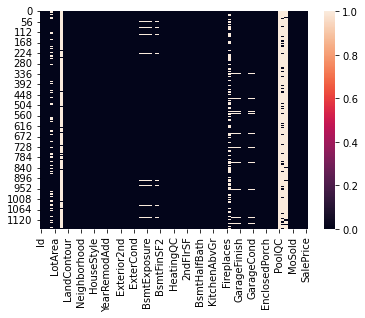

In [23]:
# Let us visualize the null values using heatmap:
sns.heatmap(main_data.isnull())

- Now we are able to visualize the missing data in our dataset.

In [24]:
main_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [25]:
# checking null values:
predict_data.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [26]:
missing_counts = predict_data.isnull().sum()
missing_counts[missing_counts > 0].sort_values(ascending=False)

PoolQC          292
MiscFeature     282
Alley           278
Fence           248
FireplaceQu     139
LotFrontage      45
GarageType       17
GarageYrBlt      17
GarageFinish     17
GarageQual       17
GarageCond       17
BsmtExposure      7
BsmtFinType1      7
BsmtFinType2      7
BsmtCond          7
BsmtQual          7
MasVnrArea        1
MasVnrType        1
Electrical        1
dtype: int64

- In this way we are able to check the columns having null values.

<IPython.core.display.Javascript object>

<AxesSubplot:>

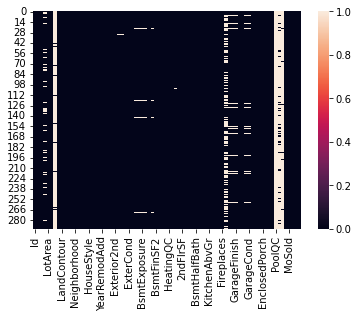

In [27]:
# Let us visualize the null values using heatmap:
sns.heatmap(predict_data.isnull())

- Now we are able to visualize the missing data in our dataset.

In [28]:
predict_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [29]:
# Let us first fill the missing values of main_data:
object_datatype

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [30]:
numerical_datatype

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

# Filling the Missing values of Main_data using mean,median,mode:

In [31]:
# Let us check all the null values again to confirm which columns are numeric.
null_counts = main_data.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
BsmtExposure      31
BsmtFinType2      31
BsmtCond          30
BsmtFinType1      30
BsmtQual          30
MasVnrArea         7
MasVnrType         7
dtype: int64

In [32]:
# filling data for numerical values using mean function

main_data['LotFrontage']=main_data['LotFrontage'].replace(np.NaN, main_data['LotFrontage'].mean())
main_data['MasVnrArea']=main_data['MasVnrArea'].replace(np.NaN, main_data['MasVnrArea'].mean())
main_data['GarageYrBlt']=main_data['GarageYrBlt'].replace(np.NaN, main_data['GarageYrBlt'].mean())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
#filling the missing values for categorical data by using mode function

main_data['Alley']=main_data['Alley'].fillna(main_data['Alley'].mode()[0])
main_data['BsmtQual']=main_data['BsmtQual'].fillna(main_data['BsmtQual'].mode()[0])
main_data['BsmtCond']=main_data['BsmtCond'].fillna(main_data['BsmtCond'].mode()[0])
main_data['BsmtExposure']=main_data['BsmtExposure'].fillna(main_data['BsmtExposure'].mode()[0])
main_data['BsmtFinType1']=main_data['BsmtFinType1'].fillna(main_data['BsmtFinType1'].mode()[0])
main_data['BsmtFinType2']=main_data['BsmtFinType2'].fillna(main_data['BsmtFinType2'].mode()[0])
main_data['FireplaceQu']=main_data['FireplaceQu'].fillna(main_data['FireplaceQu'].mode()[0])
main_data['GarageType']=main_data['GarageType'].fillna(main_data['GarageType'].mode()[0])
main_data['GarageFinish']=main_data['GarageFinish'].fillna(main_data['GarageFinish'].mode()[0])
main_data['MasVnrType']=main_data['MasVnrType'].fillna(main_data['MasVnrType'].mode()[0])
main_data['GarageFinish']=main_data['GarageFinish'].fillna(main_data['GarageFinish'].mode()[0])
main_data['GarageQual']=main_data['GarageQual'].fillna(main_data['GarageQual'].mode()[0])
main_data['GarageCond']=main_data['GarageCond'].fillna(main_data['GarageCond'].mode()[0])
main_data['PoolQC']=main_data['PoolQC'].fillna(main_data['PoolQC'].mode()[0])
main_data['Fence']=main_data['Fence'].fillna(main_data['Fence'].mode()[0])
main_data['MiscFeature']=main_data['MiscFeature'].fillna(main_data['MiscFeature'].mode()[0])

#### Now we have filled all the missing data, lets check if there is any missing values in our dataset.

In [34]:
null_counts = main_data.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

- Now we are sure that there are no missing values and we can proceed.

<IPython.core.display.Javascript object>

<AxesSubplot:>

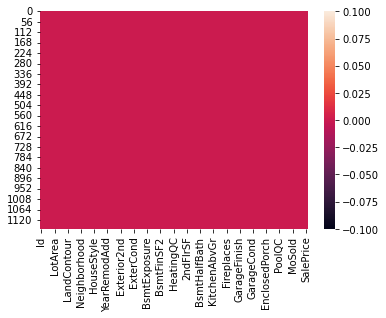

In [35]:
#Let us visualise the dataset after filling all the null values using heatmap.
sns.heatmap(main_data.isnull())

# Statistical Description :

In [36]:
# Statistical summary of dataset
main_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.988470,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,22.437056,8957.442311,1.390153,1.124343,30.145255,20.785185,182.047152,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.988470,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [37]:
predict_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,292.000000,292.000000,247.000000,292.000000,292.000000,292.000000,292.000000,292.000000,291.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,0.0,292.000000,292.000000,292.000000
mean,755.955479,57.414384,66.425101,10645.143836,6.078767,5.493151,1972.616438,1985.294521,109.171821,439.294521,...,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,NaN,28.184932,6.232877,2007.859589
std,442.565228,43.780649,21.726343,13330.669795,1.356147,1.063267,30.447016,20.105792,175.030021,429.559675,...,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,NaN,224.036218,2.774556,1.322867
min,6.000000,20.000000,21.000000,1526.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.000000
25%,377.750000,20.000000,53.500000,7200.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.000000,2007.000000
50%,778.000000,50.000000,65.000000,9200.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,369.500000,...,0.000000,28.500000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.000000
75%,1152.250000,70.000000,79.000000,11658.750000,7.000000,6.000000,2001.000000,2003.250000,180.000000,700.500000,...,149.250000,66.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.000000
max,1456.000000,190.000000,150.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1031.000000,1767.000000,...,728.000000,418.000000,330.000000,407.000000,396.000000,0.0,NaN,3500.000000,12.000000,2010.000000


### We can see that categorical data is more as compared to numerical data, so we need to convert it by using Encoding Technique.

In [38]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for i in main_data.columns:
    if main_data[i].dtypes=="object":
        main_data[i]=enc.fit_transform(main_data[i].values.reshape(-1,1))

In [39]:
main_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3.0,70.98847,4928,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,2,2007,8.0,4.0,128000
1,889,20,3.0,95.00000,15865,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,10,2007,8.0,4.0,268000
2,793,60,3.0,92.00000,9920,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,6,2007,8.0,4.0,269790
3,110,20,3.0,105.00000,11751,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,1,2010,0.0,4.0,190000
4,422,20,3.0,70.98847,16635,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,6,2009,8.0,4.0,215000
5,1197,60,3.0,58.00000,14054,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,11,2006,6.0,5.0,219210
6,561,20,3.0,70.98847,11341,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,5,2010,8.0,4.0,121500
7,1041,20,3.0,88.00000,13125,1.0,0.0,3.0,3.0,0.0,...,0,2.0,0.0,2.0,0,1,2006,8.0,4.0,155000
8,503,20,3.0,70.00000,9170,1.0,0.0,3.0,3.0,0.0,...,0,2.0,0.0,2.0,400,4,2007,8.0,4.0,140000
9,576,50,3.0,80.00000,8480,1.0,0.0,3.0,3.0,0.0,...,0,2.0,2.0,2.0,0,10,2008,0.0,0.0,118500


# VISUALIZATION OF DATA

#### Countplot

In [40]:
import warnings
warnings.filterwarnings('ignore')

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
203000     1
144900     1
37900      1
178400     1
183200     1
Name: SalePrice, Length: 581, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

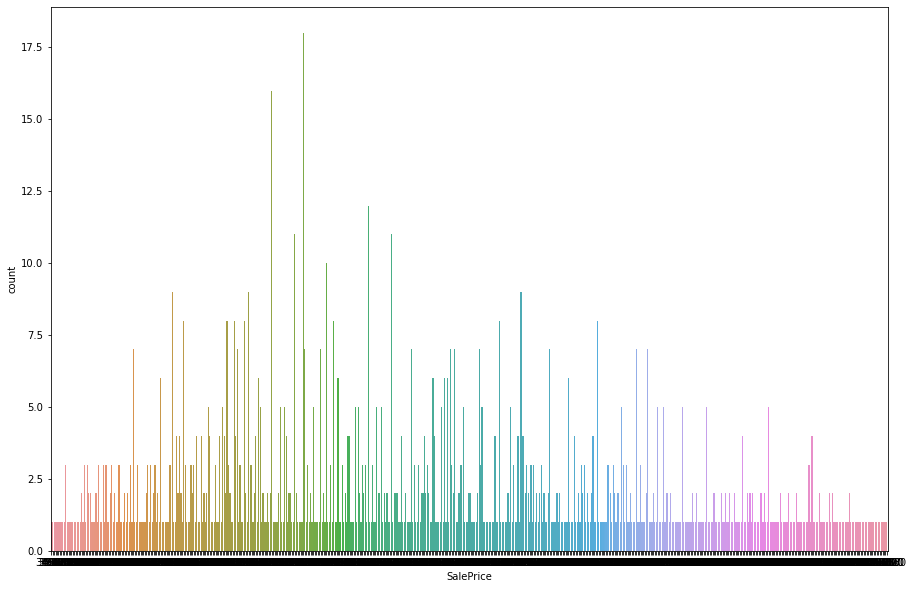

In [41]:
print(main_data["SalePrice"].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(main_data["SalePrice"])
plt.show()

4.0    945
5.0    108
0.0     81
3.0     18
2.0     12
1.0      4
Name: SaleCondition, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

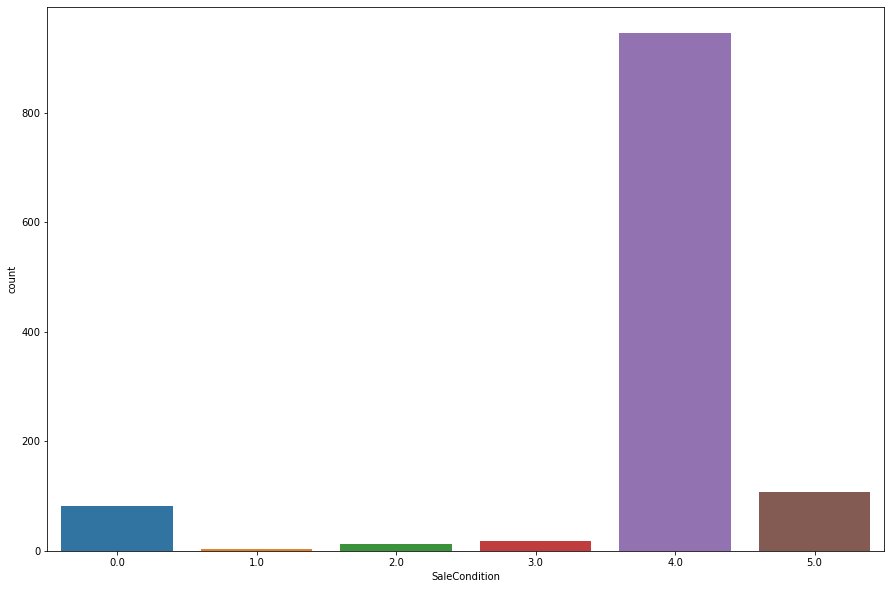

In [42]:
print(main_data["SaleCondition"].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(main_data["SaleCondition"])
plt.show()

8.0    999
6.0    106
0.0     38
3.0      8
4.0      5
5.0      4
7.0      3
1.0      3
2.0      2
Name: SaleType, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

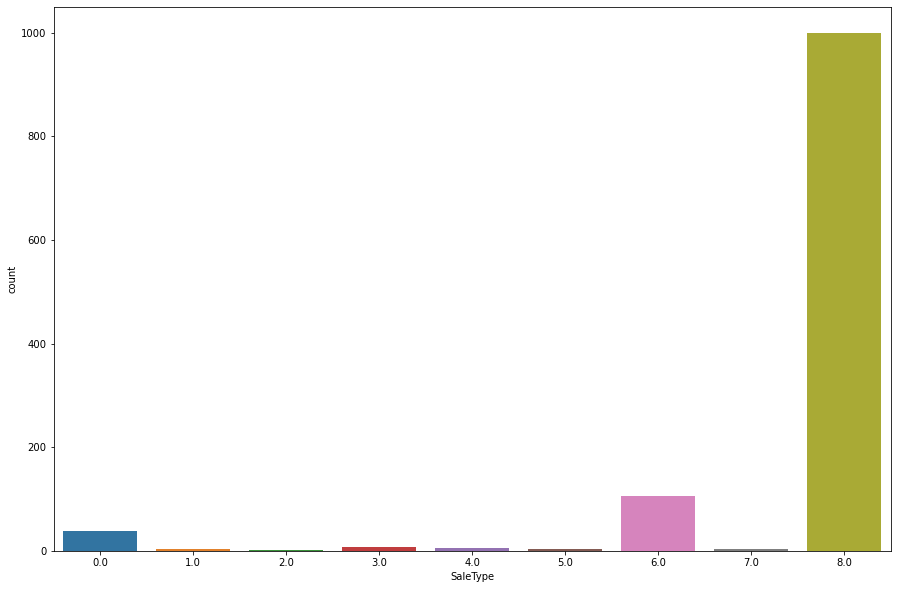

In [43]:
print(main_data["SaleType"].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(main_data["SaleType"])
plt.show()

2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

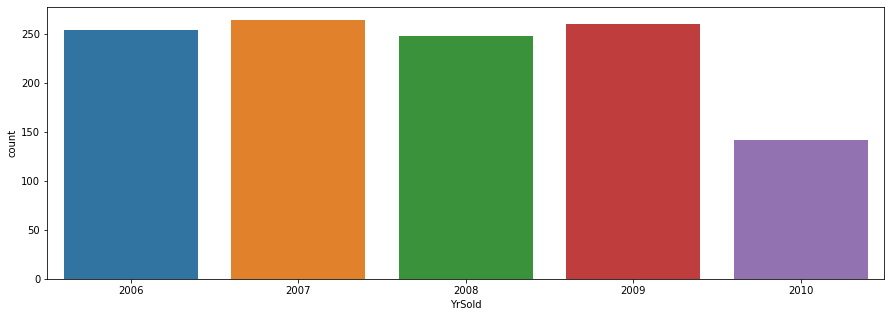

In [44]:
print(main_data["YrSold"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(main_data["YrSold"])
plt.show()

6     203
7     187
5     166
4     113
8      95
3      87
11     67
10     66
9      57
12     46
1      44
2      37
Name: MoSold, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

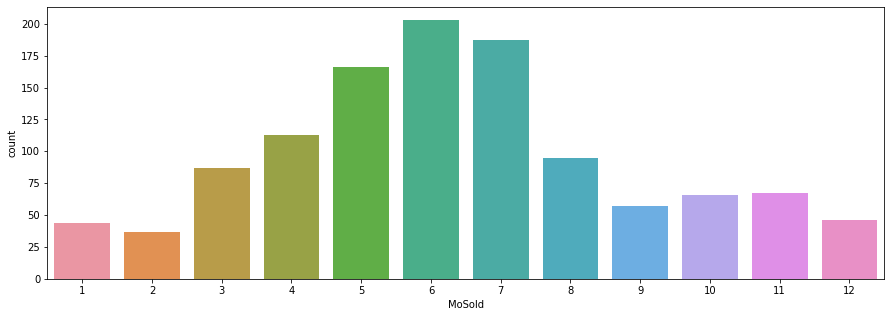

In [45]:
print(main_data["MoSold"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(main_data["MoSold"])
plt.show()

0        1126
400        10
500         7
2000        4
600         3
700         3
1200        2
1150        1
480         1
1300        1
1400        1
8300        1
620         1
15500       1
450         1
800         1
54          1
350         1
560         1
2500        1
Name: MiscVal, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

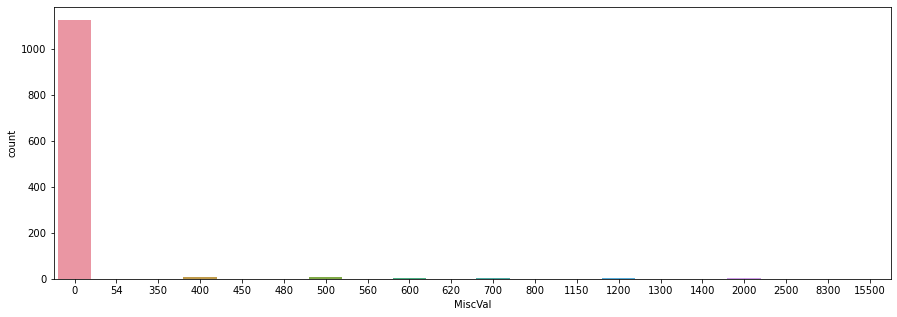

In [46]:
print(main_data["MiscVal"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(main_data["MiscVal"])
plt.show()

2.0    1164
0.0       2
3.0       1
1.0       1
Name: MiscFeature, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

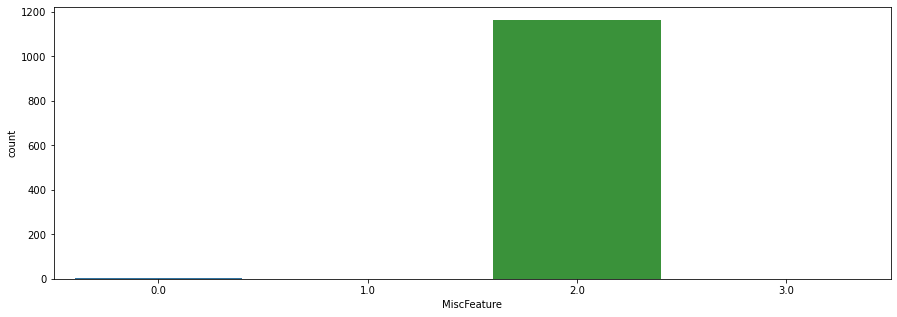

In [47]:
print(main_data["MiscFeature"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(main_data["MiscFeature"])
plt.show()

2.0    1060
0.0      51
1.0      47
3.0      10
Name: Fence, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

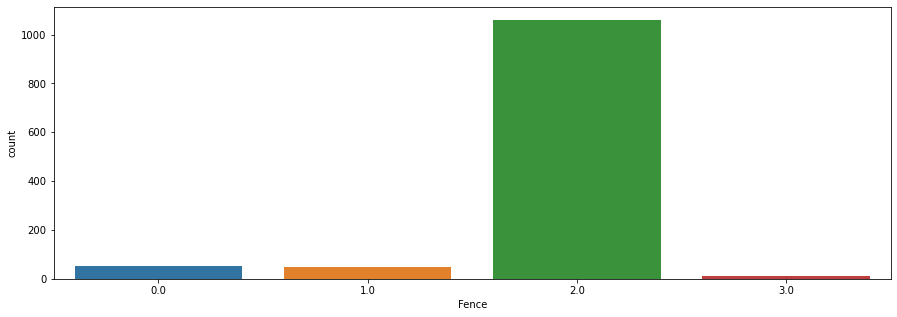

In [48]:
print(main_data["Fence"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(main_data["Fence"])
plt.show()

2.0    1164
0.0       2
1.0       2
Name: PoolQC, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

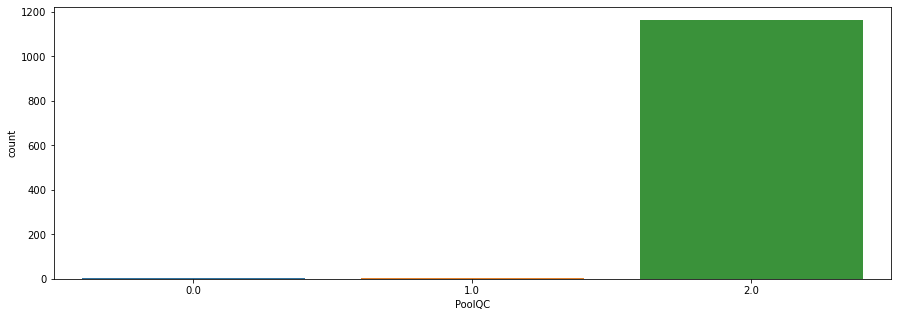

In [49]:
print(main_data["PoolQC"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(main_data["PoolQC"])
plt.show()

0      1161
555       1
576       1
738       1
519       1
480       1
648       1
512       1
Name: PoolArea, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

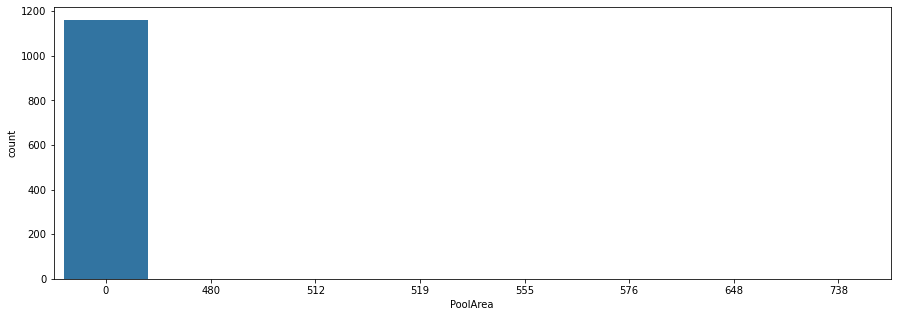

In [50]:
print(main_data["PoolArea"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(main_data["PoolArea"])
plt.show()

0.0    1168
Name: Utilities, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

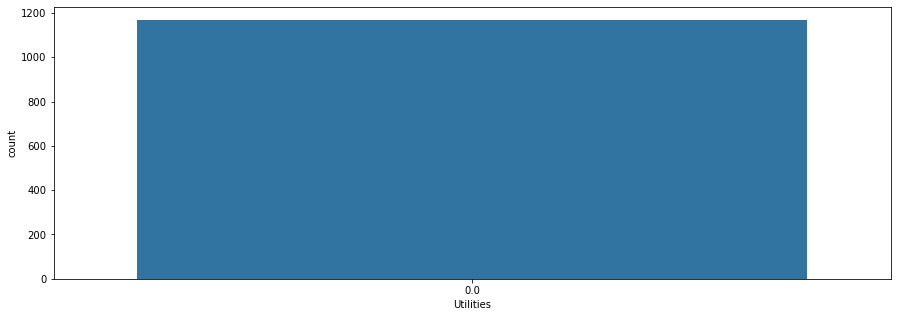

In [51]:
print(main_data["Utilities"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(main_data["Utilities"])
plt.show()

3.0    1046
0.0      50
1.0      42
2.0      30
Name: LandContour, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

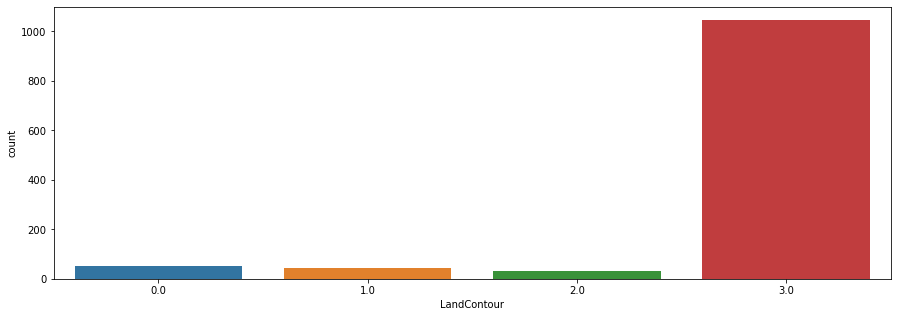

In [52]:
print(main_data["LandContour"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(main_data["LandContour"])
plt.show()

3.0    740
0.0    390
1.0     32
2.0      6
Name: LotShape, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

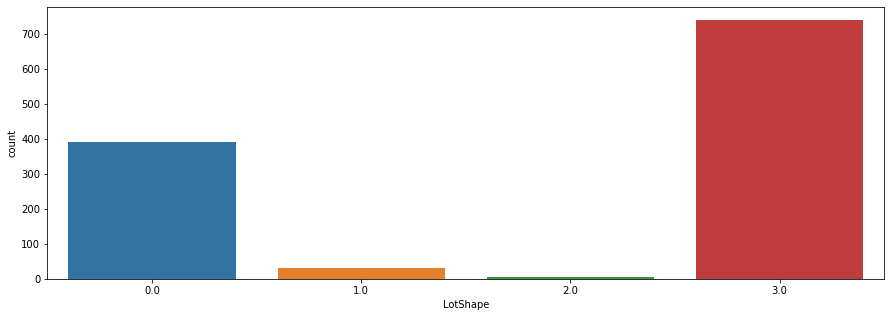

In [53]:
print(main_data["LotShape"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(main_data["LotShape"])
plt.show()

0.0    1132
1.0      36
Name: Alley, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

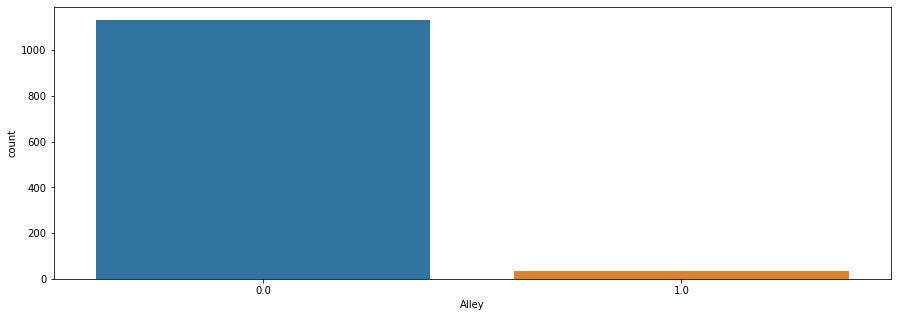

In [54]:
print(main_data["Alley"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(main_data["Alley"])
plt.show()

1.0    1164
0.0       4
Name: Street, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

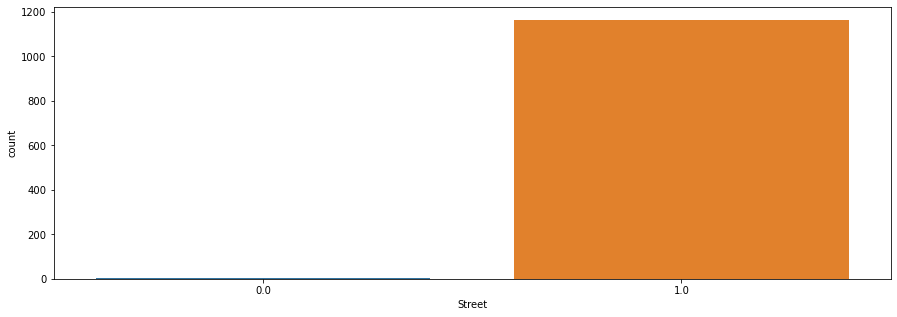

In [55]:
print(main_data["Street"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(main_data["Street"])
plt.show()

9600     21
7200     18
6000     16
8400     14
9000     11
         ..
12803     1
9480      1
13478     1
12122     1
7861      1
Name: LotArea, Length: 892, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

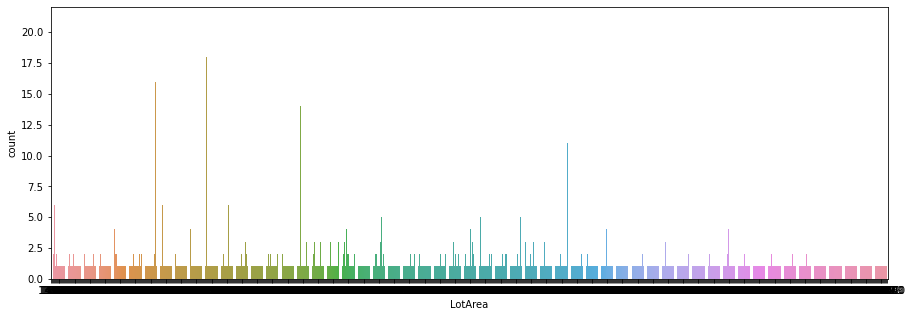

In [56]:
print(main_data["LotArea"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(main_data["LotArea"])
plt.show()

70.98847     214
60.00000     111
80.00000      60
70.00000      58
75.00000      46
            ... 
128.00000      1
152.00000      1
149.00000      1
112.00000      1
153.00000      1
Name: LotFrontage, Length: 107, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

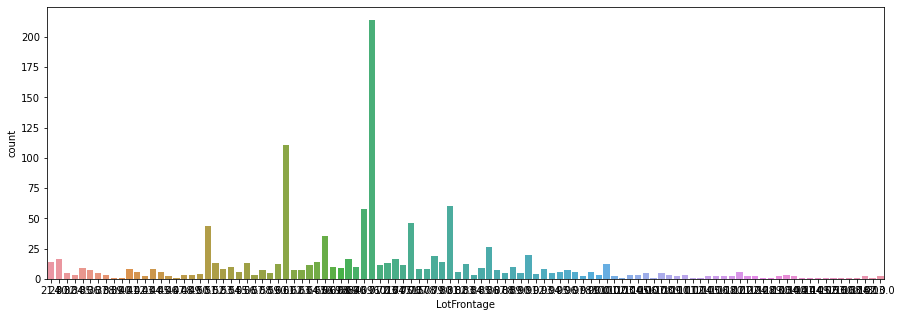

In [57]:
print(main_data["LotFrontage"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(main_data["LotFrontage"])
plt.show()

3.0    928
4.0    163
1.0     52
2.0     16
0.0      9
Name: MSZoning, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

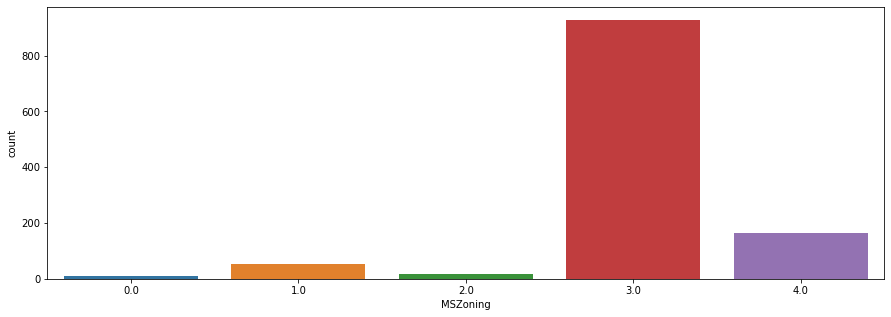

In [58]:
print(main_data["MSZoning"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(main_data["MSZoning"])
plt.show()

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

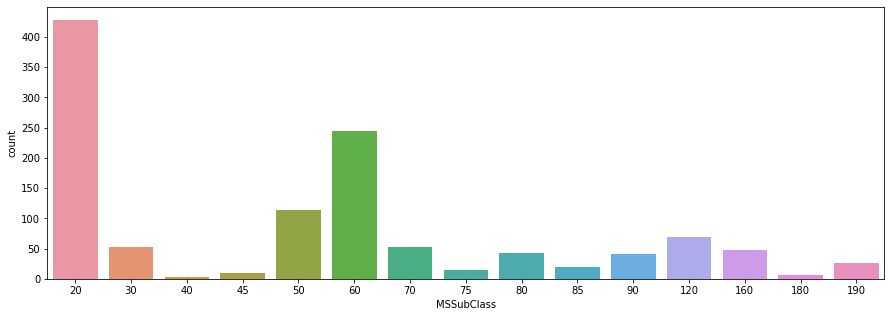

In [59]:
print(main_data["MSSubClass"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(main_data["MSSubClass"])
plt.show()

127     1
1391    1
1389    1
448     1
1179    1
       ..
1402    1
661     1
101     1
415     1
617     1
Name: Id, Length: 1168, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

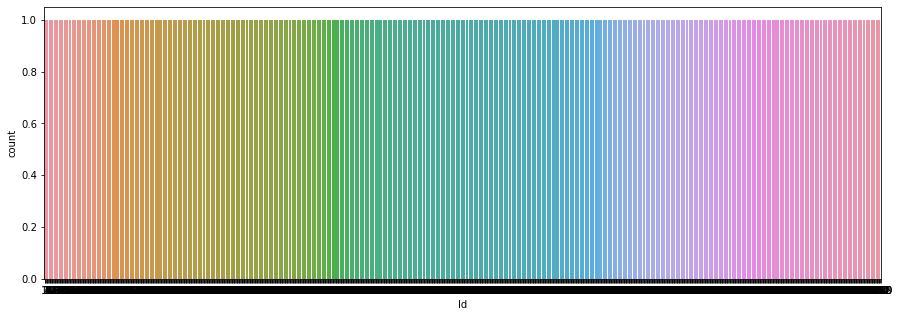

In [60]:
print(main_data["Id"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(main_data["Id"])
plt.show()

### Above count plot gives us clear idea about the counts of our variable.

##### We can see that column 'Id' is just the unique numbers given to our data, which has no relevant input to our data, so we will drop it.

In [61]:
main_data.drop(columns=["Id"],axis=1,inplace=True)

#### Scatterplot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

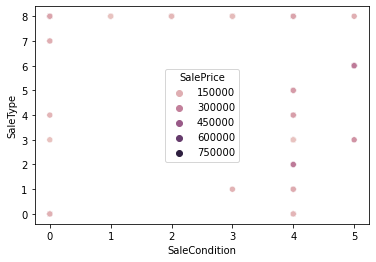

In [62]:
sns.scatterplot(x = "SaleCondition", y = "SaleType",hue='SalePrice', data = main_data)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

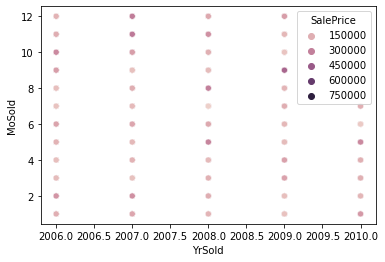

In [63]:
sns.scatterplot(x = "YrSold", y = "MoSold",hue='SalePrice', data = main_data)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

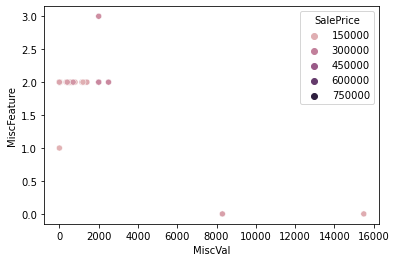

In [64]:
sns.scatterplot(x = "MiscVal", y = "MiscFeature",hue='SalePrice', data = main_data)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

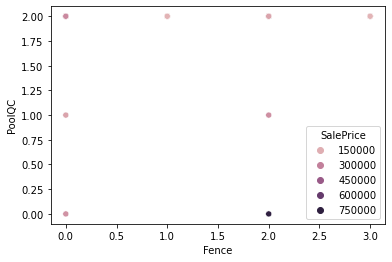

In [65]:
sns.scatterplot(x = "Fence", y = "PoolQC",hue='SalePrice', data = main_data)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

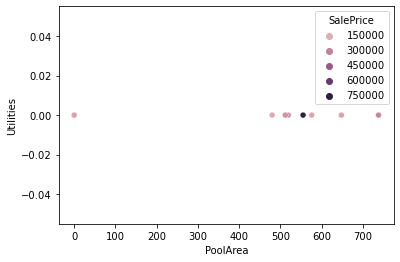

In [66]:
sns.scatterplot(x = "PoolArea", y = "Utilities",hue='SalePrice', data = main_data)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

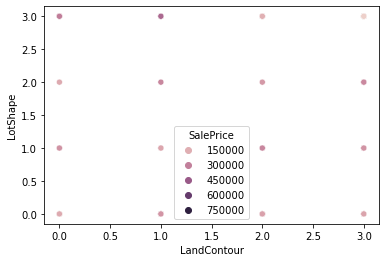

In [67]:
sns.scatterplot(x = "LandContour", y = "LotShape",hue='SalePrice', data = main_data)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

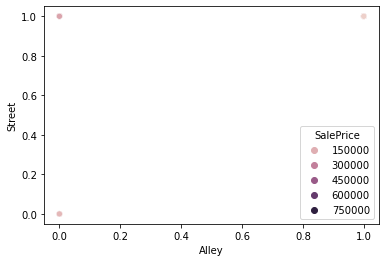

In [68]:
sns.scatterplot(x = "Alley", y = "Street",hue='SalePrice', data = main_data)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

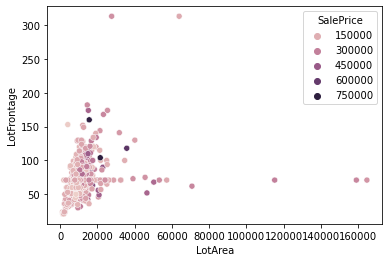

In [69]:
sns.scatterplot(x = "LotArea", y = "LotFrontage",hue='SalePrice', data = main_data)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

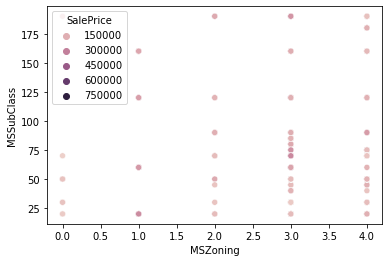

In [70]:
sns.scatterplot(x = "MSZoning", y = "MSSubClass",hue='SalePrice', data = main_data)
plt.show()

#### Bar Plot

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

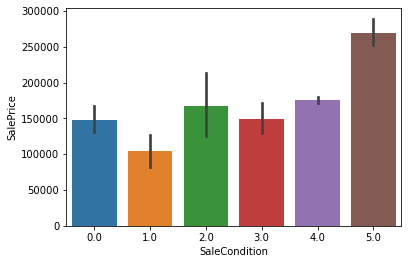

In [74]:
sns.barplot(data=main_data,x='SaleCondition',y='SalePrice')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

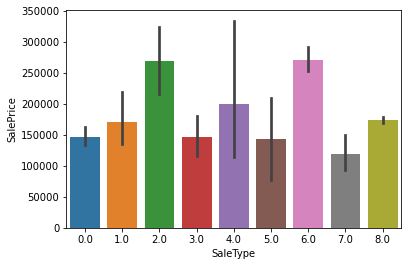

In [75]:
sns.barplot(data=main_data,x='SaleType',y='SalePrice')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

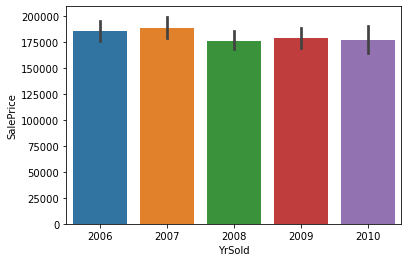

In [76]:
sns.barplot(data=main_data,x='YrSold',y='SalePrice')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

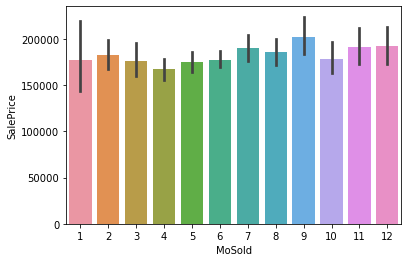

In [77]:
sns.barplot(data=main_data,x='MoSold',y='SalePrice')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

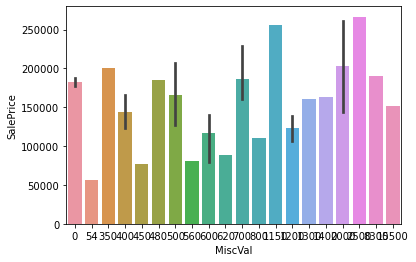

In [78]:
sns.barplot(data=main_data,x='MiscVal',y='SalePrice')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>

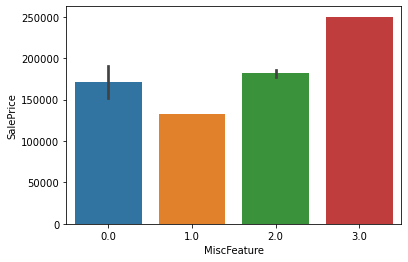

In [79]:
sns.barplot(data=main_data,x='MiscFeature',y='SalePrice')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

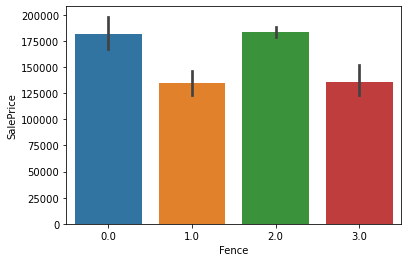

In [80]:
sns.barplot(data=main_data,x='Fence',y='SalePrice')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

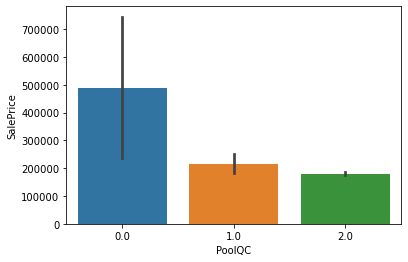

In [81]:
sns.barplot(data=main_data,x='PoolQC',y='SalePrice')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>

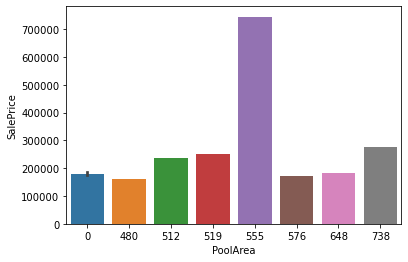

In [82]:
sns.barplot(data=main_data,x='PoolArea',y='SalePrice')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

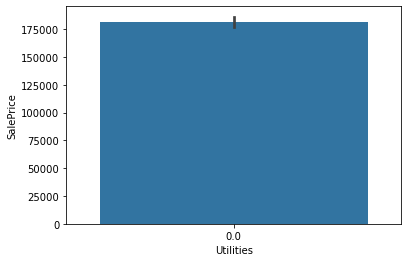

In [83]:
sns.barplot(data=main_data,x='Utilities',y='SalePrice')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

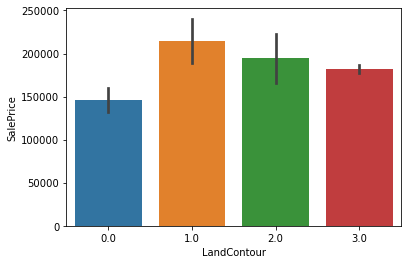

In [84]:
sns.barplot(data=main_data,x='LandContour',y='SalePrice')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

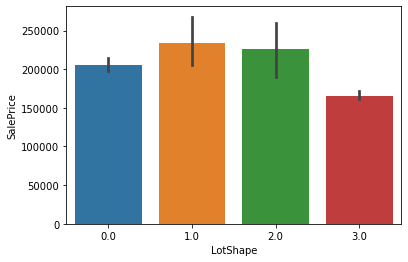

In [85]:
sns.barplot(data=main_data,x='LotShape',y='SalePrice')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

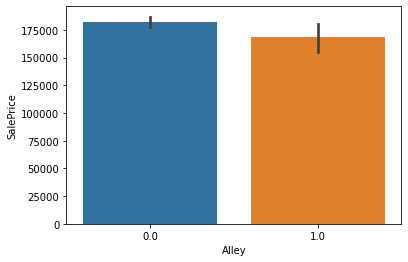

In [86]:
sns.barplot(data=main_data,x='Alley',y='SalePrice')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

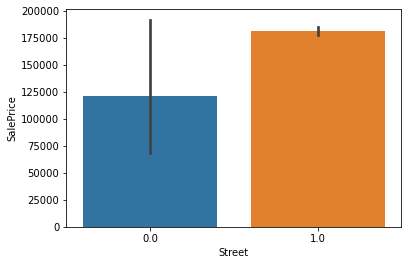

In [87]:
sns.barplot(data=main_data,x='Street',y='SalePrice')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

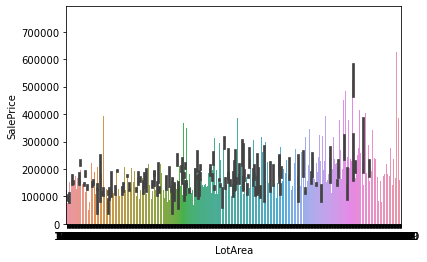

In [88]:
sns.barplot(data=main_data,x='LotArea',y='SalePrice')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

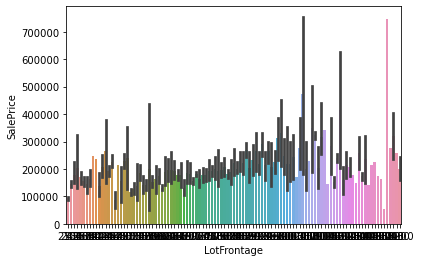

In [89]:
sns.barplot(data=main_data,x='LotFrontage',y='SalePrice')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

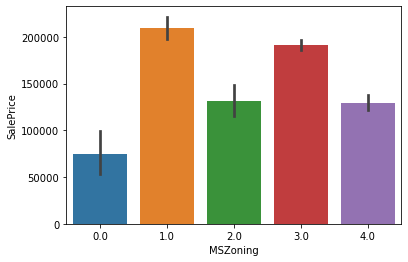

In [90]:
sns.barplot(data=main_data,x='MSZoning',y='SalePrice')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

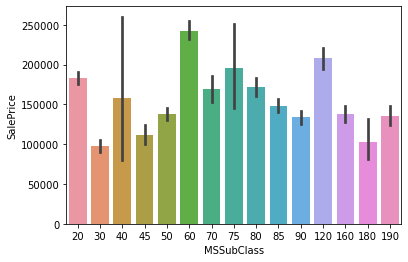

In [91]:
sns.barplot(data=main_data,x='MSSubClass',y='SalePrice')

- Above is the bar plot representation of our dataset.

# Distribution plot

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='SaleCondition', ylabel='Density'>

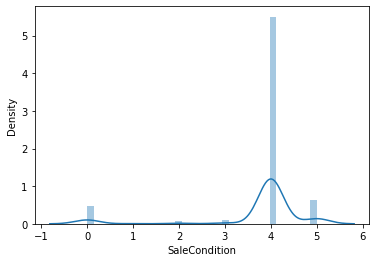

In [93]:
sns.distplot(main_data['SaleCondition'])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='SaleType', ylabel='Density'>

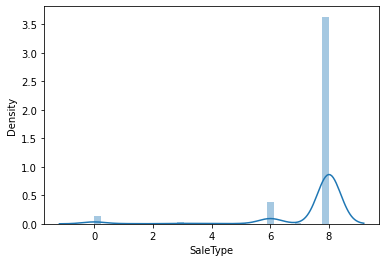

In [94]:
sns.distplot(main_data['SaleType'])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='YrSold', ylabel='Density'>

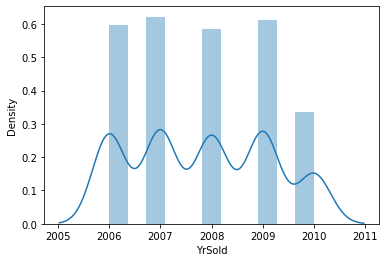

In [95]:
sns.distplot(main_data['YrSold'])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='MoSold', ylabel='Density'>

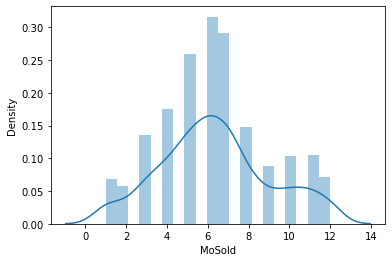

In [96]:
sns.distplot(main_data['MoSold'])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='MiscVal', ylabel='Density'>

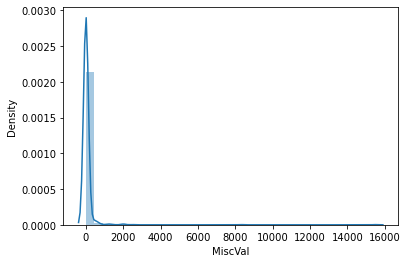

In [97]:
sns.distplot(main_data['MiscVal'])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='MiscFeature', ylabel='Density'>

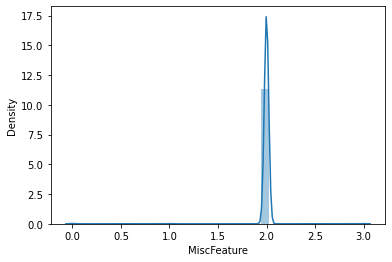

In [98]:
sns.distplot(main_data['MiscFeature'])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Fence', ylabel='Density'>

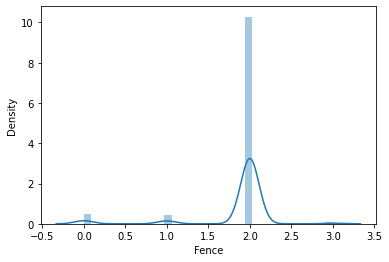

In [99]:
sns.distplot(main_data['Fence'])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='PoolQC', ylabel='Density'>

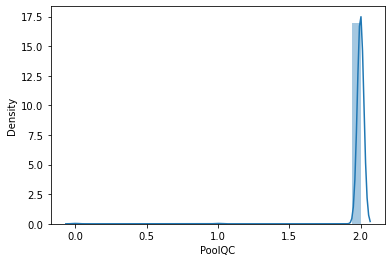

In [100]:
sns.distplot(main_data['PoolQC'])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='PoolArea', ylabel='Density'>

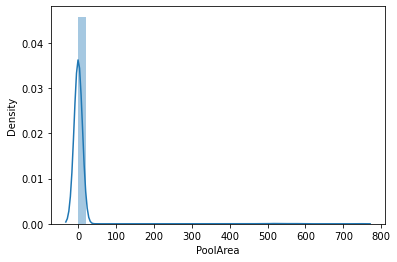

In [101]:
sns.distplot(main_data['PoolArea'])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

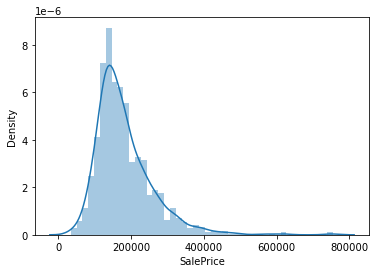

In [102]:
sns.distplot(main_data['SalePrice'])

# Removing outliers using Zscore method

In [108]:
numerical_datatype

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [110]:
# Features containing outliers
from scipy.stats import zscore

features = main_data[['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']]

# Using zscore to remove outliers

z=np.abs(zscore(features))

z

<IPython.core.display.Javascript object>

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.508301,0.000000,0.620616,0.075169,0.530217,0.168236,0.421565,0.562238,0.702161,0.285392,...,0.762907,2.387850,0.364375,0.125172,0.273377,0.076845,0.087131,1.617822,0.605487,0.676310
1,0.877042,1.070631,0.600903,1.364138,0.359572,0.030885,0.710356,0.562238,0.202665,4.749787,...,0.120585,2.417992,0.364375,0.125172,3.795117,0.076845,0.087131,1.361470,0.605487,1.094234
2,0.077095,0.936867,0.063075,0.644484,0.530217,0.831975,0.589202,0.562238,0.902279,0.285392,...,0.664476,1.257525,0.364375,0.125172,0.273377,0.076845,0.087131,0.128176,0.605487,1.116872
3,0.877042,1.516514,0.141424,0.075169,0.359572,0.201423,0.373434,2.075571,0.562795,0.285392,...,0.762907,1.136957,0.364375,0.125172,0.273377,0.076845,0.087131,1.990233,1.651563,0.107788
4,0.877042,0.000000,0.686902,0.075169,1.249361,0.201423,0.733598,0.130186,1.732609,0.285392,...,1.140270,0.701705,0.364375,0.125172,0.273377,0.076845,0.087131,0.128176,0.899213,0.423957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0.877042,0.000000,0.074355,0.794823,0.530217,0.130446,0.854752,0.391880,0.011404,0.285392,...,0.762907,0.701705,0.364375,0.125172,0.273377,0.076845,0.087131,1.617822,1.651563,0.752191
1164,0.877042,0.177839,0.190733,1.514476,0.530217,0.727811,0.877993,0.562238,0.961639,0.285392,...,0.762907,0.745111,0.364375,0.125172,0.273377,0.076845,0.087131,0.500587,0.899213,0.929245
1165,2.462438,2.095132,0.916362,0.075169,0.359572,0.168236,0.421565,0.562238,0.262233,0.285392,...,0.073005,0.701705,0.364375,0.125172,0.273377,0.076845,0.087131,0.244236,0.899213,0.417052
1166,0.315629,0.935838,0.221670,1.514476,1.420006,1.690232,1.672992,0.562238,0.961639,0.285392,...,0.762907,0.112129,2.358693,0.125172,0.273377,0.076845,0.087131,0.244236,0.146863,1.789224


In [111]:
# Creating new dataframe
new_data = main_data[(z<3).all(axis=1)] 
new_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3.0,70.98847,4928,1.0,0.0,0.0,3.0,0.0,4.0,...,0,2.0,2.0,2.0,0,2,2007,8.0,4.0,128000
2,60,3.0,92.00000,9920,1.0,0.0,0.0,3.0,0.0,1.0,...,0,2.0,2.0,2.0,0,6,2007,8.0,4.0,269790
3,20,3.0,105.00000,11751,1.0,0.0,0.0,3.0,0.0,4.0,...,0,2.0,2.0,2.0,0,1,2010,0.0,4.0,190000
5,60,3.0,58.00000,14054,1.0,0.0,0.0,3.0,0.0,4.0,...,0,2.0,2.0,2.0,0,11,2006,6.0,5.0,219210
6,20,3.0,70.98847,11341,1.0,0.0,0.0,3.0,0.0,4.0,...,0,2.0,2.0,2.0,0,5,2010,8.0,4.0,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,3.0,70.98847,9819,1.0,0.0,0.0,3.0,0.0,4.0,...,0,2.0,2.0,2.0,0,2,2010,8.0,4.0,122000
1164,20,3.0,67.00000,8777,1.0,0.0,3.0,3.0,0.0,4.0,...,0,2.0,2.0,2.0,0,5,2009,8.0,4.0,108000
1165,160,3.0,24.00000,2280,1.0,0.0,3.0,3.0,0.0,2.0,...,0,2.0,2.0,2.0,0,7,2009,8.0,4.0,148500
1166,70,0.0,50.00000,8500,1.0,1.0,3.0,3.0,0.0,4.0,...,0,2.0,2.0,2.0,0,7,2008,8.0,4.0,40000


In [112]:
#checking % of data loss
new_data.shape

(803, 80)

In [113]:
(1168-803)/1168*100

31.25

- Our 31% of data will be lost if we use z-score method, this is not worth it.

# Removing the outlier using IQR Method

In [114]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

new_data1=main_data[~((main_data < (Q1 - 1.5 * IQR)) |(main_data > (Q3 + 1.5 * IQR))).any(axis=1)]
new_data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2,60,3.0,92.00000,9920,1.0,0.0,0.0,3.0,0.0,1.0,...,0,2.0,2.0,2.0,0,6,2007,8.0,4.0,269790
5,60,3.0,58.00000,14054,1.0,0.0,0.0,3.0,0.0,4.0,...,0,2.0,2.0,2.0,0,11,2006,6.0,5.0,219210
10,50,4.0,50.00000,8600,1.0,0.0,3.0,0.0,0.0,4.0,...,0,2.0,2.0,2.0,0,6,2006,8.0,4.0,119500
11,60,3.0,44.00000,9548,1.0,0.0,0.0,3.0,0.0,1.0,...,0,2.0,2.0,2.0,0,1,2010,8.0,4.0,237000
13,20,3.0,80.00000,8892,1.0,0.0,0.0,3.0,0.0,4.0,...,0,2.0,2.0,2.0,0,7,2007,0.0,4.0,126500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,20,4.0,80.00000,8546,1.0,0.0,3.0,3.0,0.0,0.0,...,0,2.0,2.0,2.0,0,3,2010,8.0,4.0,140000
1158,20,3.0,70.98847,11250,1.0,0.0,0.0,3.0,0.0,4.0,...,0,2.0,2.0,2.0,0,6,2006,8.0,4.0,165000
1161,60,3.0,70.98847,10762,1.0,0.0,0.0,3.0,0.0,1.0,...,0,2.0,2.0,2.0,0,5,2009,8.0,4.0,225000
1163,20,3.0,70.98847,9819,1.0,0.0,0.0,3.0,0.0,4.0,...,0,2.0,2.0,2.0,0,2,2010,8.0,4.0,122000


In [115]:
#checking the %loss of data
(1168-451)/1168*100

61.38698630136986

OMG!! by using IQR method our 61% data i.e more than half data will be lost, so we are going to skip the outliers removal section and proceed as is.

# Checking Correlation

In [117]:
corr=main_data.corr()
corr

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.007478,-0.336681,-0.124151,-0.035981,0.216396,0.104485,-0.021387,NaN,0.076880,...,0.009583,-0.002076,0.043111,0.005979,-0.023503,-0.016015,-0.038595,0.035050,-0.028981,-0.060775
MSZoning,0.007478,1.000000,-0.069661,-0.023328,0.140215,-0.371755,0.053655,0.001175,NaN,-0.027246,...,-0.001663,0.001204,-0.035770,0.000802,0.003416,-0.051646,-0.004964,0.079854,0.004501,-0.133221
LotFrontage,-0.336681,-0.069661,1.000000,0.299452,-0.035309,-0.187657,-0.144523,-0.073451,NaN,-0.192468,...,0.196001,-0.165312,-0.051760,0.008257,-0.001329,0.022517,-0.003885,-0.035356,0.065091,0.323779
LotArea,-0.124151,-0.023328,0.299452,1.000000,-0.263973,-0.093239,-0.189201,-0.159038,NaN,-0.152063,...,0.097107,-0.047619,-0.003495,-0.017412,0.051679,0.015141,-0.035399,0.005421,0.034236,0.249499
Street,-0.035981,0.140215,-0.035309,-0.263973,1.000000,0.010454,-0.012941,0.105226,NaN,0.000153,...,0.004505,-0.003260,-0.015249,-0.002171,-0.030354,-0.008860,-0.019635,0.025920,0.014176,0.044753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.016015,-0.051646,0.022517,0.015141,-0.008860,-0.050530,-0.050418,-0.023872,NaN,0.019084,...,-0.038624,0.034737,-0.015444,-0.002149,-0.008773,1.000000,-0.144536,-0.063667,-0.003462,0.072764
YrSold,-0.038595,-0.004964,-0.003885,-0.035399,-0.019635,-0.007352,0.021421,0.009499,NaN,-0.009817,...,-0.066063,0.061556,-0.021308,0.001527,-0.008439,-0.144536,1.000000,0.013606,0.024505,-0.045508
SaleType,0.035050,0.079854,-0.035356,0.005421,0.025920,-0.002348,-0.015161,-0.041763,NaN,-0.002039,...,0.014047,-0.018351,-0.003769,-0.012223,0.015900,-0.063667,0.013606,1.000000,0.143557,-0.050851
SaleCondition,-0.028981,0.004501,0.065091,0.034236,0.014176,-0.043124,-0.054905,0.047715,NaN,0.043692,...,-0.074354,0.121812,0.045229,-0.007701,0.012178,-0.003462,0.024505,0.143557,1.000000,0.217687


# Correlation using Heatmap

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Corrleation Matrix'}>

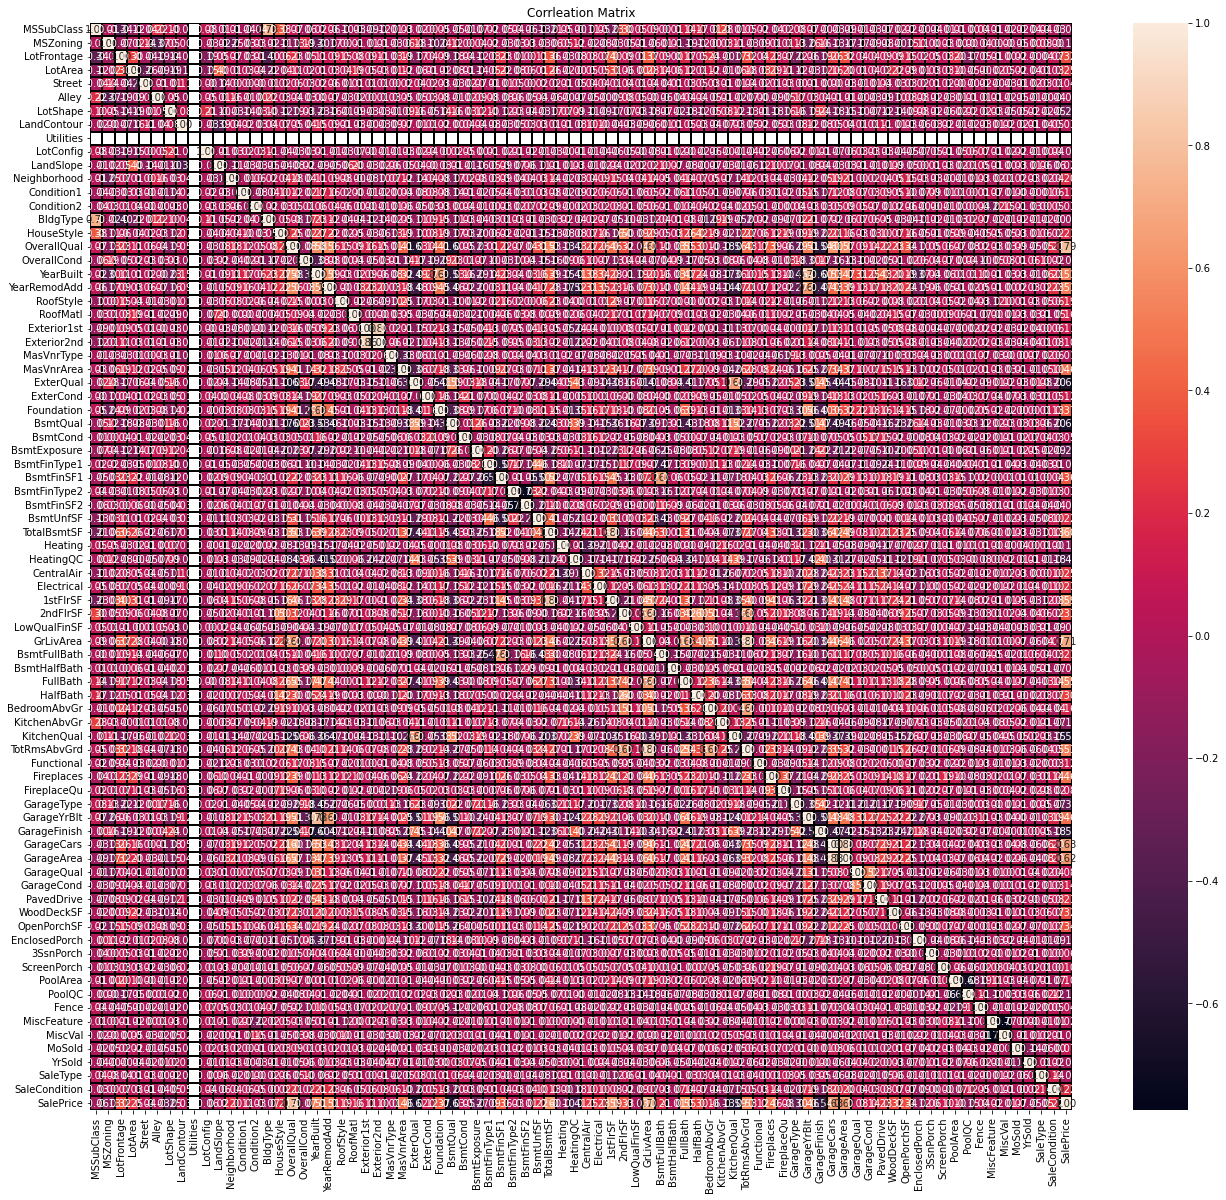

In [118]:
plt.figure(figsize=(22,20))
plt.title("Corrleation Matrix")
sns.heatmap(corr,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

- Due to huge number of columns, I am unable to identify the heatmap visualization.

In [119]:
corr_matrix=main_data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
GarageArea      0.619000
                  ...   
GarageFinish   -0.537121
KitchenQual    -0.592468
ExterQual      -0.624820
BsmtQual       -0.626850
Utilities            NaN
Name: SalePrice, Length: 80, dtype: float64

##### Now we can clearly identify the correlation of independent variables with the target variables "SalePrice".There are around 25 variables who has less than 0.01 correlation value(very week relationship.)

### Checking the columns which are postively and negative correlated with the target columns:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

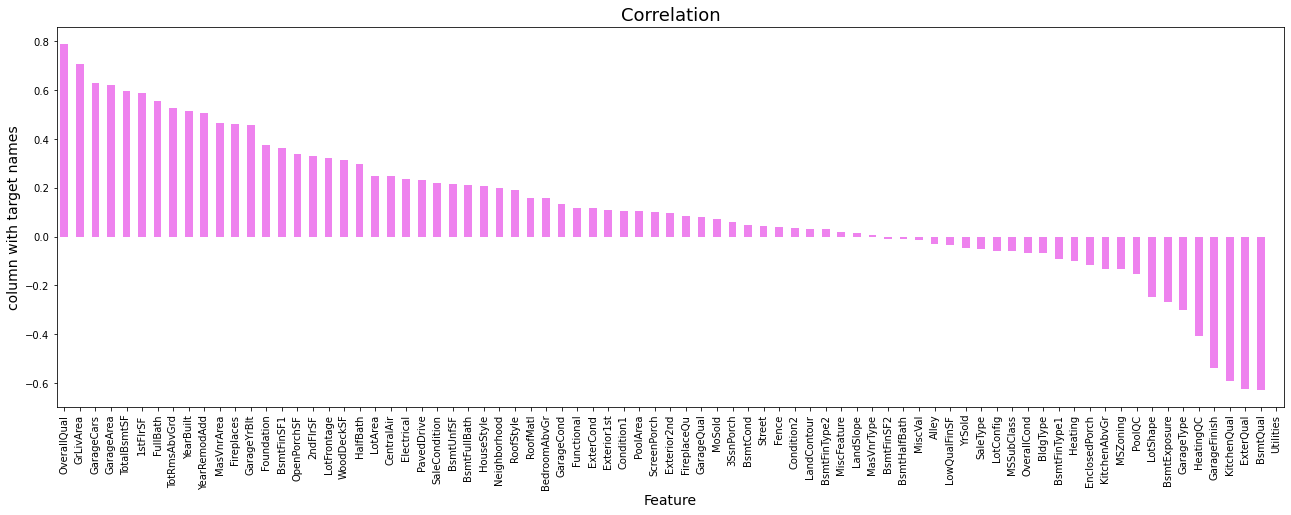

In [120]:
plt.figure(figsize=(22,7))
main_data.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='violet')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [121]:
collist=main_data.columns.values
ncol=12
nrow=10

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

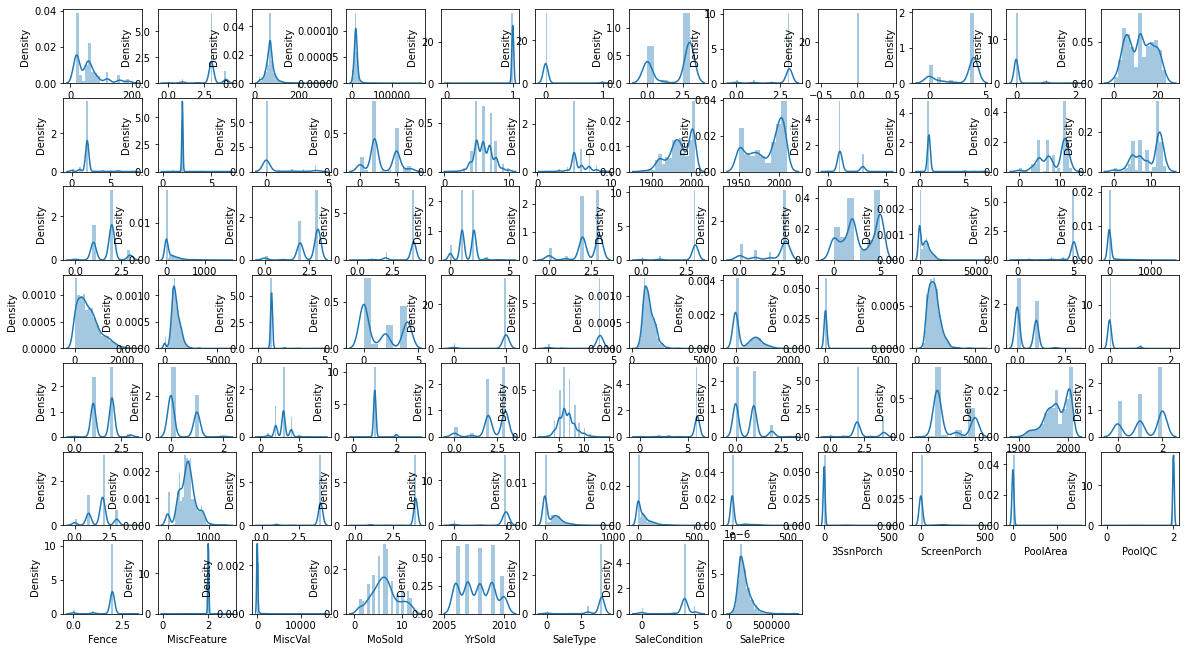

In [122]:
# Lets check distribution among the columns:

# using = plt.figure(figsize=(5*totalcol,5*totalcol))

plt.figure(figsize=(20,16))
for i in range(0, len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(main_data[collist[i]])

- We can see skewness in data for the multiple columns, will handle the skewness in further steps.

### Outliers Check:

There are 80 columns in dataset so its not possible to plot each and every columns separately or plot all together. so we will print in 4 steps

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

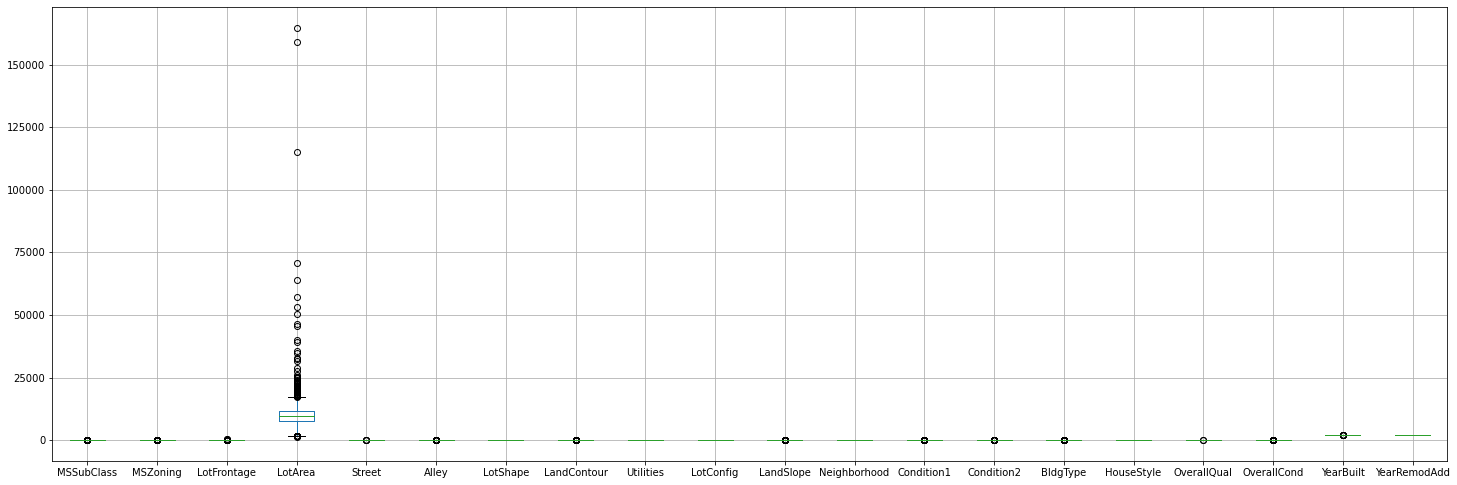

In [123]:
#Plotting Boxplots for first 20 columns
main_data.iloc[:,0:20].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

- There are outliers in lot area column.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

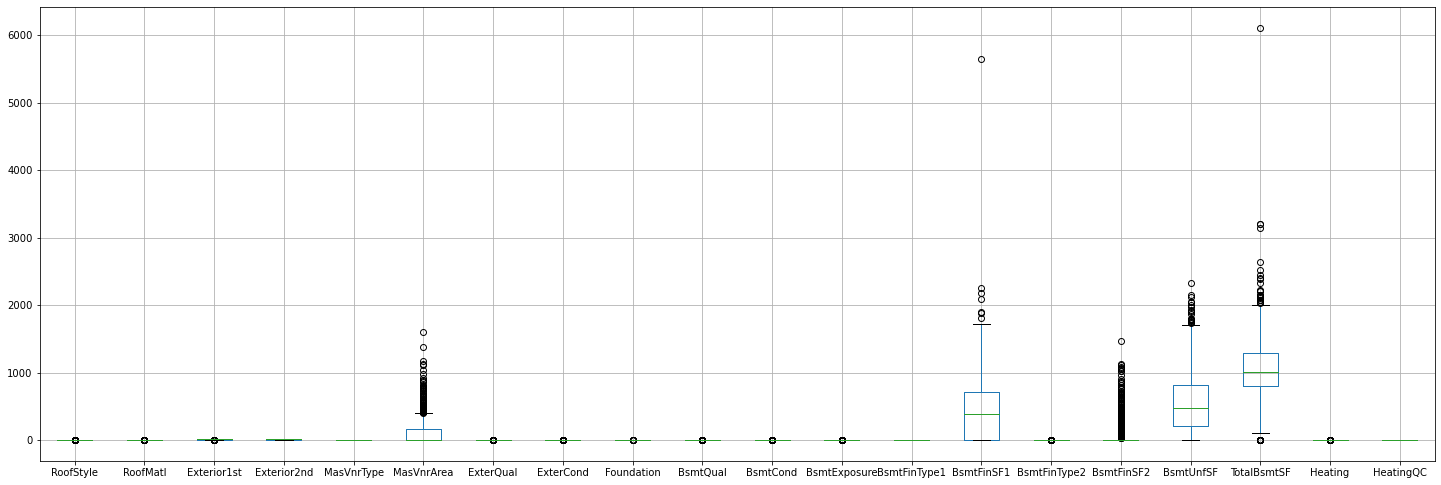

In [124]:
#Plotting boxplot for next 20 columns
main_data.iloc[:,20:40].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

- We can see outliers in MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

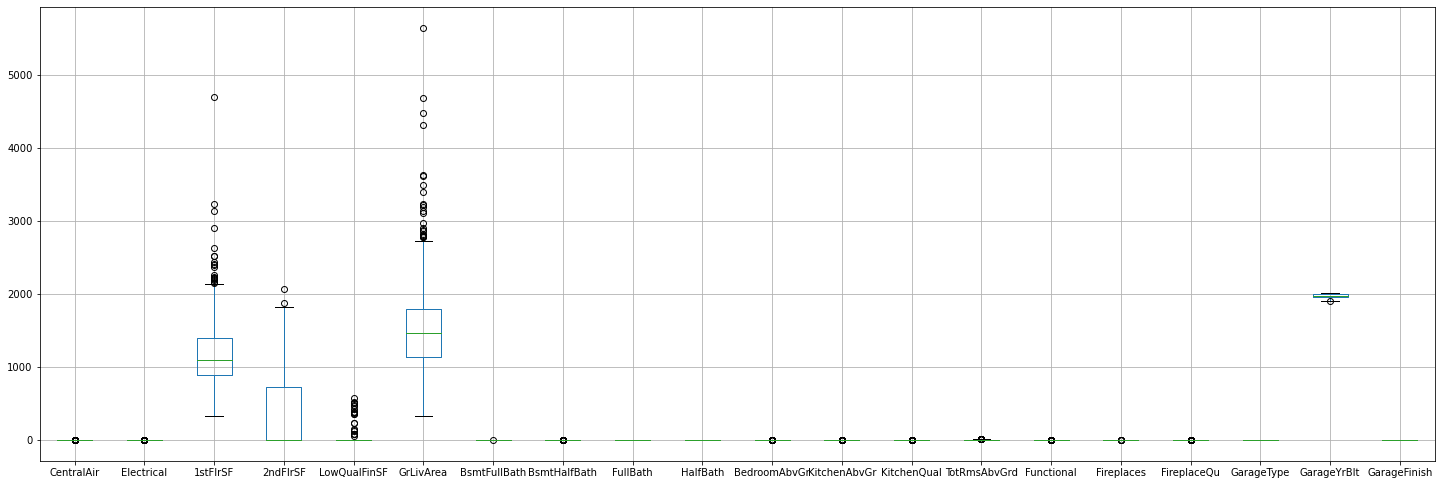

In [125]:
#Plotting boxplot for next 20 columns
main_data.iloc[:,40:60].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

- We can see outliers in 1stFlrSF, LowQualFinSF,GrLivArea,GarageYrBuilt.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

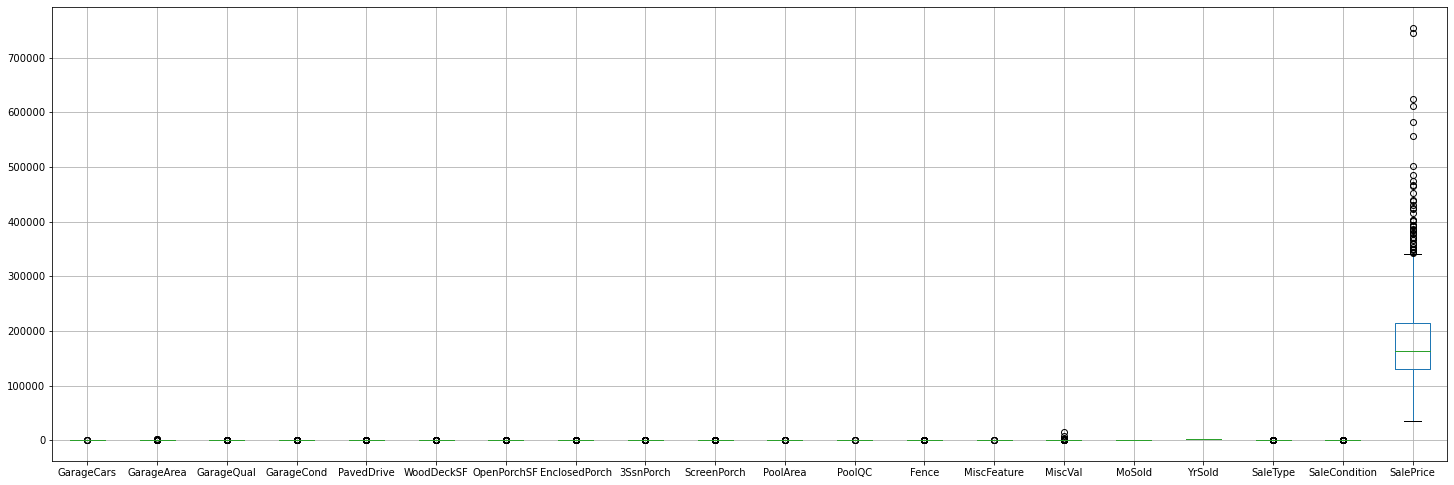

In [126]:
#Plotting boxplot for next 20 columns
main_data.iloc[:,60:80].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

- The outliers are not consider for target variables.

# Checking Skewness

In [127]:
main_data.skew()

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 80, dtype: float64

#### We can see skewness in the dataset,We will handle the skewness using power transform function.

# Splitting the indepedent and target variable in x and y

In [128]:
x= main_data.drop('SalePrice',axis=1)
y= main_data['SalePrice']

In [129]:
from sklearn.preprocessing import power_transform
main_data_new=power_transform(x)
main_data_new=pd.DataFrame(main_data_new,columns=x.columns)

<IPython.core.display.Javascript object>

In [130]:
main_data_new.skew()

MSSubClass        0.064007
MSZoning          0.233113
LotFrontage       0.161368
LotArea           0.032509
Street          -17.021969
                   ...    
MiscVal           4.991071
MoSold           -0.035838
YrSold            0.112893
SaleType         -2.067563
SaleCondition    -0.353292
Length: 79, dtype: float64

Skweness has been removed, now we can proceed with further steps.

In [131]:
x=main_data_new
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.370435,-0.162456,0.093658,-1.213954,0.058621,-0.178331,-1.366794,0.341434,0.0,0.617281,...,-0.297551,-0.077648,0.058621,0.177447,0.010754,-0.193133,-1.719437,-0.604806,0.409069,0.029735
1,-1.167999,-0.162456,1.117135,1.100521,0.058621,-0.178331,-1.366794,0.341434,0.0,0.617281,...,3.360787,-0.077648,0.058621,0.177447,0.010754,-0.193133,1.320612,-0.604806,0.409069,0.029735
2,0.490047,-0.162456,0.998803,0.158048,0.058621,-0.178331,-1.366794,0.341434,0.0,-1.482445,...,-0.297551,-0.077648,0.058621,0.177447,0.010754,-0.193133,-0.076750,-0.604806,0.409069,0.029735
3,-1.167999,-0.162456,1.495566,0.496002,0.058621,-0.178331,-1.366794,0.341434,0.0,0.617281,...,-0.297551,-0.077648,0.058621,0.177447,0.010754,-0.193133,-2.209015,1.649761,-2.769993,0.029735
4,-1.167999,-0.162456,0.093658,1.196626,0.058621,-0.178331,-1.366794,0.341434,0.0,-1.025661,...,-0.297551,-0.077648,0.058621,0.177447,0.010754,-0.193133,-0.076750,0.899576,0.409069,0.029735


# Importing Libraries for Metrics and Model buiding.

In [132]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

# Regression Method

#### Linear Regression Model

In [133]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [134]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.8611677417605524
At random state 0,the testing accuracy is:0.628543451685366


At random state 1,the training accuracy is:0.8428239091093619
At random state 1,the testing accuracy is:0.8000539545822424


At random state 2,the training accuracy is:0.8596729941342558
At random state 2,the testing accuracy is:0.7392990894236702


At random state 3,the training accuracy is:0.834580868271456
At random state 3,the testing accuracy is:0.8139192242994092


At random state 4,the training accuracy is:0.8402030252831431
At random state 4,the testing accuracy is:0.7652914322123914


At random state 5,the training accuracy is:0.8792582711524813
At random state 5,the testing accuracy is:0.6385851517386119


At random state 6,the training accuracy is:0.8383164814685756
At random state 6,the testing accuracy is:0.8066459436204518


At random state 7,the training accuracy is:0.8477157800191992
At random state 7,the testing accuracy is:0.762779696196981


At 

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=99)
lr.fit(x_train,y_train)

LinearRegression()

In [136]:
print(lr.intercept_)

181339.64574815478


In [137]:
coeff_main_data=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff_main_data

<IPython.core.display.Javascript object>

,Co-efficient
MSSubClass,-3538.667442
MSZoning,-434.942731
LotFrontage,-247.224523
LotArea,4182.564275
Street,1051.408353
...,...
MiscVal,-318.875000
MoSold,-2290.875000
YrSold,-580.000000
SaleType,-2025.000000


In [138]:
pred=lr.predict(x_test)

In [139]:
main_data=pd.DataFrame({'Actual':y_test,'Predicted':pred})
main_data.head()

<IPython.core.display.Javascript object>

,Actual,Predicted
1166,40000,58069.535926
610,285000,292909.248707
304,190000,184954.240887
266,175500,178058.334232
434,159950,120168.382528


In [141]:
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error: 23289.706239410585
Mean squared error: 1091736190.0783575


<IPython.core.display.Javascript object>

Root mean squared error: 33041.43141690985


In [142]:
predict_test=lr.predict(x_test)
print(r2_score(y_test,predict_test)*100)


predict_train=lr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

82.1516778378564
83.16968119489059


- The Cross validation Score for Linear Regression Model

In [143]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f'At cross fold(i) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for tesing is {Test_accuracy}')
    print('\n')

At cross fold(i) the cv score is -1.9671023590597517e+22 and accuracy score for training is 0.8316968119489059 and accuracy score for tesing is 0.821516778378564


At cross fold(i) the cv score is 0.6743823383345467 and accuracy score for training is 0.8316968119489059 and accuracy score for tesing is 0.821516778378564


At cross fold(i) the cv score is 0.7346376602537392 and accuracy score for training is 0.8316968119489059 and accuracy score for tesing is 0.821516778378564


At cross fold(i) the cv score is 0.7511221332298149 and accuracy score for training is 0.8316968119489059 and accuracy score for tesing is 0.821516778378564


At cross fold(i) the cv score is 0.7218670127371487 and accuracy score for training is 0.8316968119489059 and accuracy score for tesing is 0.821516778378564


At cross fold(i) the cv score is 0.7339313193677154 and accuracy score for training is 0.8316968119489059 and accuracy score for tesing is 0.821516778378564


At cross fold(i) the cv score is 0.757766

#### Since the number dont have such impact on the accuracy and cv_score.

#### Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

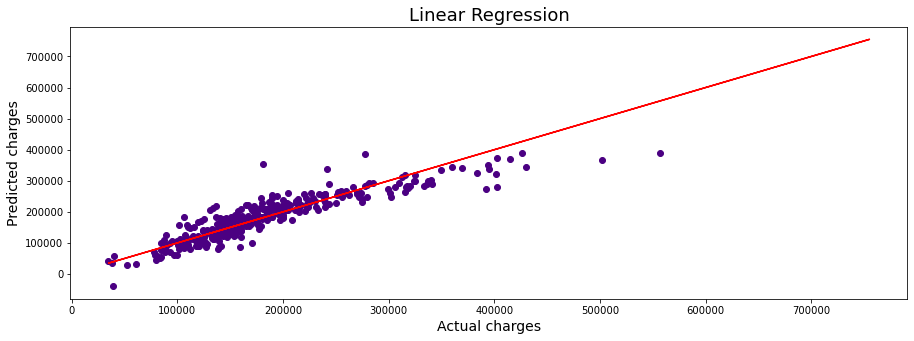

In [144]:
plt.figure(figsize=(15,5))
plt.scatter(x=y_test,y=predict_test, color='indigo')
plt.plot(y,y, color='red')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Random Forest Regressor Model

In [145]:
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    rdr.fit(x_train,y_train)
    pred_train=rdr.predict(x_train)
    pred_test=rdr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')
    
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=99)
rdr.fit(x_train,y_train)

pred=rdr.predict(x_test)

main_data=pd.DataFrame({'Actual':y_test,'Predicted':pred})
main_data.head()

print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

At random state 0,the training accuracy is:0.9828644176830957
At random state 0,the testing accuracy is:0.707944606646319


At random state 1,the training accuracy is:0.976939782436457
At random state 1,the testing accuracy is:0.8669994699486265


At random state 2,the training accuracy is:0.9774866084307565
At random state 2,the testing accuracy is:0.8469757387360162


At random state 3,the training accuracy is:0.9765863276612893
At random state 3,the testing accuracy is:0.8614986564520165


At random state 4,the training accuracy is:0.974244599347691
At random state 4,the testing accuracy is:0.8583142224624196


At random state 5,the training accuracy is:0.980896896352969
At random state 5,the testing accuracy is:0.6839115311450579


At random state 6,the training accuracy is:0.977640722895724
At random state 6,the testing accuracy is:0.892400735902792


At random state 7,the training accuracy is:0.9754724252538878
At random state 7,the testing accuracy is:0.8604345985512716


At ran

<IPython.core.display.Javascript object>

Mean absolute error: 17414.83888888889
Mean squared error: 653529961.0107194


<IPython.core.display.Javascript object>

Root mean squared error: 25564.232063778472


In [146]:
predict_test=rdr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

predict_train=rdr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

89.31572169839376
97.90223675876884


- The Cross validation score for Random Forest Regressor Model

In [147]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rdr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.8209459377255404 and accuracy score for training is 0.9790223675876883 and accuracy score  for testing is 0.8931572169839376


At cross fold(j) the cv score is 0.8568806814281312 and accuracy score for training is 0.9790223675876883 and accuracy score  for testing is 0.8931572169839376


At cross fold(j) the cv score is 0.8335000123880204 and accuracy score for training is 0.9790223675876883 and accuracy score  for testing is 0.8931572169839376


At cross fold(j) the cv score is 0.8440210481598882 and accuracy score for training is 0.9790223675876883 and accuracy score  for testing is 0.8931572169839376


At cross fold(j) the cv score is 0.8526714263240779 and accuracy score for training is 0.9790223675876883 and accuracy score  for testing is 0.8931572169839376


At cross fold(j) the cv score is 0.8270109490182623 and accuracy score for training is 0.9790223675876883 and accuracy score  for testing is 0.8931572169839376


At cross fold(j) the cv scor

#### Since the number don't have such impact on the accuracy and cv_score.

#### Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

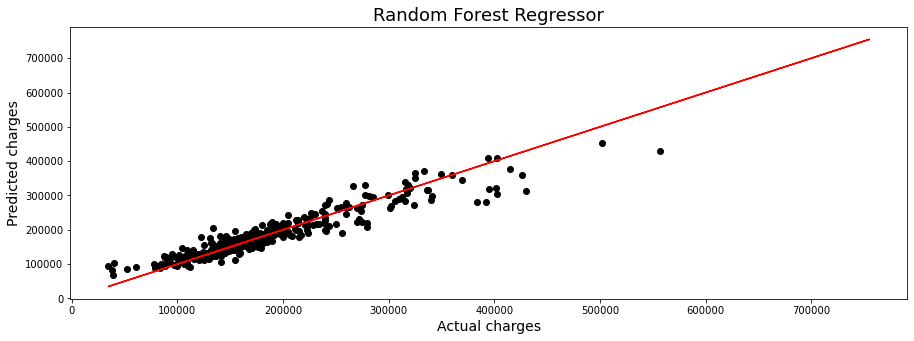

In [148]:
plt.figure(figsize=(15,5))
plt.scatter(x=y_test,y=predict_test, color='black')
plt.plot(y,y, color='red')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

# Decision Tree Regressor Model

In [151]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:1.0
At random state 0,the testing accuracy is:0.42781265024434556


At random state 1,the training accuracy is:1.0
At random state 1,the testing accuracy is:0.751113715419153


At random state 2,the training accuracy is:1.0
At random state 2,the testing accuracy is:0.7381708260826632


At random state 3,the training accuracy is:1.0
At random state 3,the testing accuracy is:0.717556157818931


At random state 4,the training accuracy is:1.0
At random state 4,the testing accuracy is:0.5902123003008515


At random state 5,the training accuracy is:1.0
At random state 5,the testing accuracy is:0.5526088999048042


At random state 6,the training accuracy is:1.0
At random state 6,the testing accuracy is:0.8145032351324706


At random state 7,the training accuracy is:1.0
At random state 7,the testing accuracy is:0.7862283393141143


At random state 8,the training accuracy is:1.0
At random state 8,the testing accuracy is:0.7709491029864369


At random s

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=6)
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [153]:
pred=dtr.predict(x_test)

In [154]:
main_data=pd.DataFrame({'Actual':y_test,'Predicted':pred})
main_data.head()

<IPython.core.display.Javascript object>

,Actual,Predicted
601,289000,324000.0
137,106500,119750.0
33,128500,134900.0
315,155000,148500.0
199,237500,272000.0


In [155]:
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error: 25217.467236467237
Mean squared error: 1177672327.5982907


<IPython.core.display.Javascript object>

Root mean squared error: 34317.230768205794


In [156]:
predict_test=dtr.predict(x_test)
print(r2_score(y_test,predict_test)*100)


predict_train=dtr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

79.17412390417049
100.0


#### The Cross validation score for Decision Tree Regressor model

In [157]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.610936071166041 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7917412390417048


At cross fold(j) the cv score is 0.7014088227470011 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7917412390417048


At cross fold(j) the cv score is 0.72321499878737 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7917412390417048


At cross fold(j) the cv score is 0.7197779704372038 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7917412390417048


At cross fold(j) the cv score is 0.716148851906667 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7917412390417048


At cross fold(j) the cv score is 0.6698098156044522 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7917412390417048


At cross fold(j) the cv score is 0.7417056996835283 and accuracy score for training is 1.0 and accuracy score  for testing

Since the number dont have such impact on the accuracy and cv_score.

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

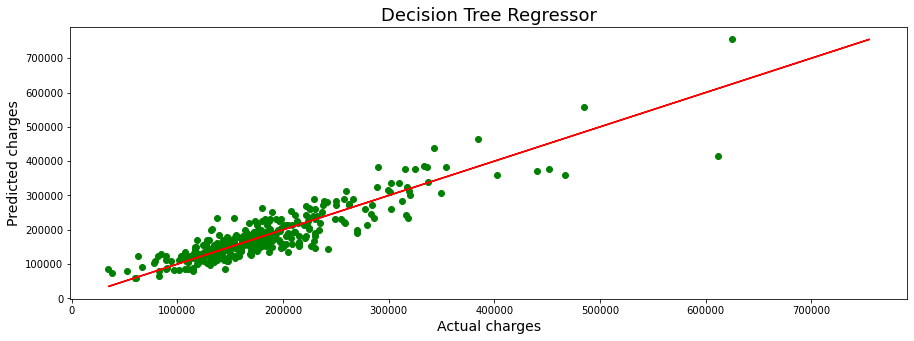

In [158]:
plt.figure(figsize=(15,5))
plt.scatter(x=y_test,y=predict_test, color='g')
plt.plot(y,y, color='r')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show()

# XGBoost Regressor

In [159]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    xgb.fit(x_train,y_train)
    pred_train=xgb.predict(x_train)
    pred_test=xgb.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.9999802874571215
At random state 0,the testing accuracy is:0.6843023662485805


At random state 1,the training accuracy is:0.9999788602949843
At random state 1,the testing accuracy is:0.8416976647602586


At random state 2,the training accuracy is:0.9999379600292697
At random state 2,the testing accuracy is:0.7894234557867903


At random state 3,the training accuracy is:0.9999597840661212
At random state 3,the testing accuracy is:0.8713841341872964


At random state 4,the training accuracy is:0.9999567661380353
At random state 4,the testing accuracy is:0.8889335404477151


At random state 5,the training accuracy is:0.9999699651802348
At random state 5,the testing accuracy is:0.6309958515450369


At random state 6,the training accuracy is:0.9999671139017358
At random state 6,the testing accuracy is:0.8851880430544481


At random state 7,the training accuracy is:0.9999523964481848
At random state 7,the testing accuracy is:0.8489990555501098




In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=91)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [161]:
pred=xgb.predict(x_test)

main_data=pd.DataFrame({'Actual':y_test,'Predicted':pred})
main_data.head()

<IPython.core.display.Javascript object>

,Actual,Predicted
541,139000,128481.750000
298,117000,127760.179688
715,107000,141327.484375
144,155000,154630.156250
942,173000,152864.343750


In [162]:
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error: 17436.55966212607
Mean squared error: 679613742.2873513


<IPython.core.display.Javascript object>

Root mean squared error: 26069.402415232904


In [163]:
predict_test=xgb.predict(x_test)
print(r2_score(y_test,predict_test)*100)


predict_train=xgb.predict(x_train)
print(r2_score(y_train,predict_train)*100)

89.29571163058715
99.99495804558745


#### The Cross validation score for XGBoost Regressor model

In [164]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(xgb,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.8344857394331353 and accuracy score for training is 0.9999495804558746 and accuracy score  for testing is 0.8929571163058715


At cross fold(j) the cv score is 0.8628608752170533 and accuracy score for training is 0.9999495804558746 and accuracy score  for testing is 0.8929571163058715


At cross fold(j) the cv score is 0.8103862788818506 and accuracy score for training is 0.9999495804558746 and accuracy score  for testing is 0.8929571163058715


At cross fold(j) the cv score is 0.83162313164668 and accuracy score for training is 0.9999495804558746 and accuracy score  for testing is 0.8929571163058715


At cross fold(j) the cv score is 0.8316305153359353 and accuracy score for training is 0.9999495804558746 and accuracy score  for testing is 0.8929571163058715


At cross fold(j) the cv score is 0.8194247396059021 and accuracy score for training is 0.9999495804558746 and accuracy score  for testing is 0.8929571163058715


At cross fold(j) the cv score 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

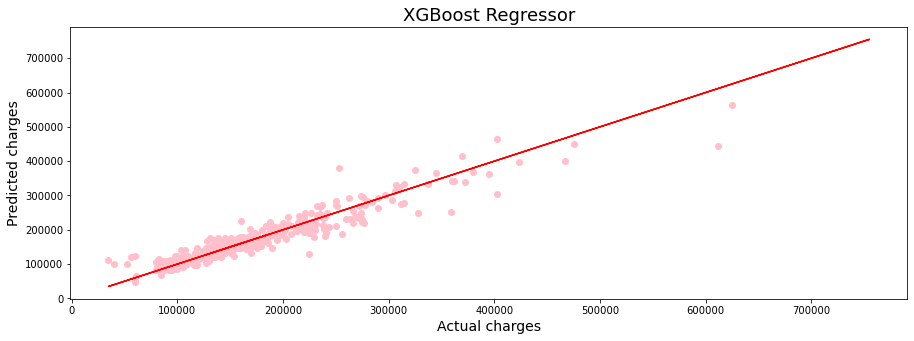

In [165]:
plt.figure(figsize=(15,5))
plt.scatter(x=y_test,y=predict_test, color='pink')
plt.plot(y,y, color='red')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('XGBoost Regressor',fontsize=18)
plt.show()

# k-nearest neighbors (KNN)

In [166]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [167]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.851285984354426
At random state 0,the testing accuracy is:0.6456181245341767


At random state 1,the training accuracy is:0.8168467673302785
At random state 1,the testing accuracy is:0.7504509663195261


At random state 2,the training accuracy is:0.8425900123988754
At random state 2,the testing accuracy is:0.6943891658213244


At random state 3,the training accuracy is:0.8147036729781624
At random state 3,the testing accuracy is:0.7718626208050055


At random state 4,the training accuracy is:0.8159175902200675
At random state 4,the testing accuracy is:0.7459843944347913


At random state 5,the training accuracy is:0.8430669142418061
At random state 5,the testing accuracy is:0.6577328767666011


At random state 6,the training accuracy is:0.8162605093746529
At random state 6,the testing accuracy is:0.7732216209988154


At random state 7,the training accuracy is:0.8374165008827061
At random state 7,the testing accuracy is:0.701454212826987


At

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=74)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [169]:
pred=knn.predict(x_test)

main_data=pd.DataFrame({'Actual':y_test,'Predicted':pred})
main_data.head()

<IPython.core.display.Javascript object>

,Actual,Predicted
823,120500,120380.0
902,97000,104200.0
903,145000,128671.6
795,107000,127410.0
535,157900,141390.0


In [170]:
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error: 21414.862108262107
Mean squared error: 845366031.7801708


<IPython.core.display.Javascript object>

Root mean squared error: 29075.17896385456


In [171]:
predict_test=knn.predict(x_test)
print(r2_score(y_test,predict_test)*100)


predict_train=knn.predict(x_train)
print(r2_score(y_train,predict_train)*100)

81.98057024260648
81.04258428235902


#### The Cross validation score for k-nearest neighbors (KNN) model

In [172]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(knn,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.7384326678824671 and accuracy score for training is 0.8104258428235901 and accuracy score  for testing is 0.8198057024260648


At cross fold(j) the cv score is 0.7317513566765554 and accuracy score for training is 0.8104258428235901 and accuracy score  for testing is 0.8198057024260648


At cross fold(j) the cv score is 0.7398074357985721 and accuracy score for training is 0.8104258428235901 and accuracy score  for testing is 0.8198057024260648


At cross fold(j) the cv score is 0.7373966936853789 and accuracy score for training is 0.8104258428235901 and accuracy score  for testing is 0.8198057024260648


At cross fold(j) the cv score is 0.7400997840498937 and accuracy score for training is 0.8104258428235901 and accuracy score  for testing is 0.8198057024260648


At cross fold(j) the cv score is 0.7305268316643686 and accuracy score for training is 0.8104258428235901 and accuracy score  for testing is 0.8198057024260648


At cross fold(j) the cv scor

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

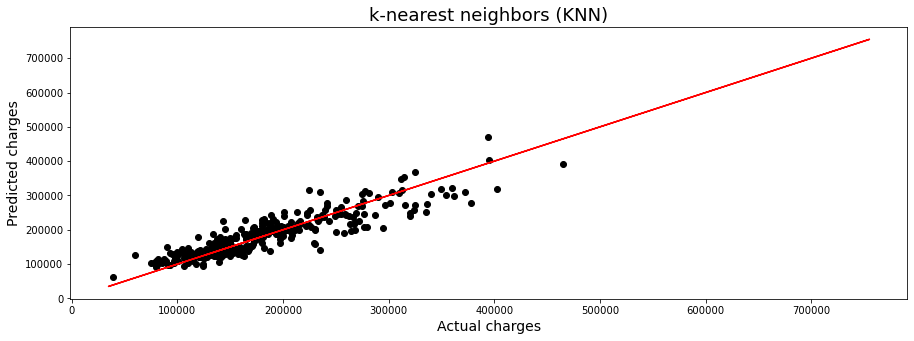

In [173]:
plt.figure(figsize=(15,5))
plt.scatter(x=y_test,y=predict_test, color='black')
plt.plot(y,y, color='r')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('k-nearest neighbors (KNN)',fontsize=18)
plt.show()

# Hyper Parameter Tuning

In [174]:
from sklearn.model_selection import GridSearchCV

# Ensemble Technique

In [175]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'random_state':list(range(0,10))}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto', 'random_state': 1}


In [176]:
rdr=RandomForestRegressor(criterion='mae',max_features='auto',random_state=8)
rdr.fit(x_train,y_train)
rdr.score(x_train,y_train)
pred_decision=rdr.predict(x_test)
rdrs=r2_score(y_test,pred_decision)
print('R2 Score:',rdrs*100)
rdrscore=cross_val_score(rdr,x,y,cv=5)
rdrc=rdrscore.mean()
print('Cross Val Score:',rdrc*100)

R2 Score: 87.30640428454488
Cross Val Score: 84.75313629049828


##### We are getting model accuracy as 87% and cross validation as 84% respectively.

In [177]:
from sklearn.ensemble import GradientBoostingRegressor
parameters = {"max_depth": [4, 5, 6],"learning_rate": [0.005, 0.009, 0.01],
                         "n_estimators": [700, 1000, 2500]}
xgb=XGBRegressor()
clf=GridSearchCV(xgb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 0.009, 'max_depth': 4, 'n_estimators': 2500}


In [178]:
xgb=GradientBoostingRegressor(max_depth=4,learning_rate=0.009,n_estimators=2500)
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
pred_decision=xgb.predict(x_test)
xgbs=r2_score(y_test,pred_decision)
print('R2 Score:',xgbs*100)
xgbscore=cross_val_score(xgb,x,y,cv=5)
xgbc=xgbscore.mean()
print('Cross Val Score:',xgbc*100)

R2 Score: 89.11762127587576
Cross Val Score: 86.79471534399218


We are getting model accuracy and cross validation has 89% & 86% respectively.

##### We can say that GradientBoostingRegressor is our best model.

# Analysis and Comparision of all regressors

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

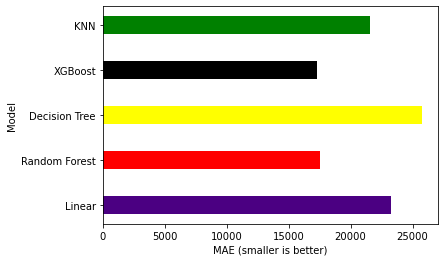

In [179]:
x = ['Linear','Random Forest', 'Decision Tree', 'XGBoost', 'KNN']
y = [23292.08, 17556.97 , 25741.56, 17275.81, 21576.03]
colors = ["indigo", "red", "yellow", "black", "green"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="MAE (smaller is better)", ylabel="Model");

- Our best model is "XGBoost" and worst model is "Decision Tree"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

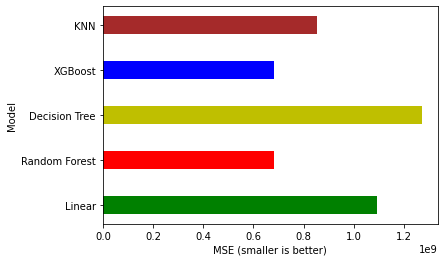

In [180]:
x = ['Linear','Random Forest', 'Decision Tree', 'XGBoost', 'KNN']
y = [1092376863.42, 681447503.74, 1271277570.76, 683514616.46, 853157344.54]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="MSE (smaller is better)", ylabel="Model");

- From above observation we can say that our best model is "Random Forest" and our worst model is "Decision Tree."

# Checking VIF(Variance Inflation Factor) values:

In [149]:
#importing VIF from statsmodels:

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Checking VIF
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

<IPython.core.display.Javascript object>

,VIF values,Features
0,6.314524,MSSubClass
1,1.656121,MSZoning
2,2.188923,LotFrontage
3,2.752909,LotArea
4,1.176800,Street
...,...,...
74,1.167536,MiscVal
75,1.105689,MoSold
76,1.118975,YrSold
77,1.352039,SaleType


# Feature Importances

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

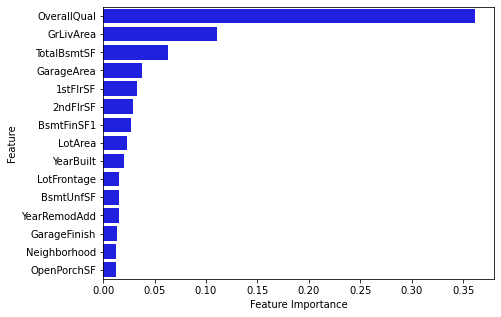

In [181]:
rdr_feature_importances = rdr.feature_importances_
rdr_feature_importances = pd.Series(rdr_feature_importances, 
                                    index=x_train.columns.values).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=rdr_feature_importances, y=rdr_feature_importances.index, color="blue");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

Let's discover the most important features as determined by XGBoost Regression:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

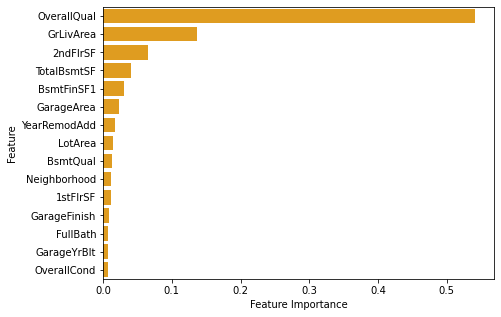

In [182]:
xgb_feature_importances = xgb.feature_importances_
xgb_feature_importances = pd.Series(xgb_feature_importances, 
                                    index=x_train.columns.values).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=xgb_feature_importances, y=xgb_feature_importances.index, color="orange");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

# Compare with Actual Final Vs Sample Prediction:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Y Test,Prediction
823,120500,120380.0
902,97000,104200.0
903,145000,128671.6
795,107000,127410.0
535,157900,141390.0


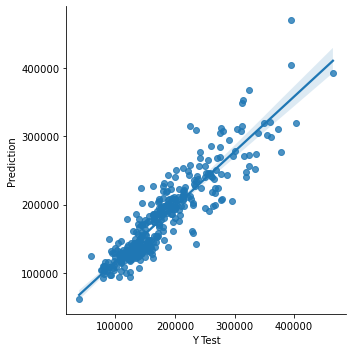

In [183]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':predict_test},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

# Model Saving

In [184]:
import joblib
filename='Housing Price Prediction Project.pkl'
joblib.dump(xgb, open(filename, 'wb'))

# Conclusion

In [185]:
loaded_model = joblib.load(open('Housing Price Prediction Project.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

89.11762127587576


In [186]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,...,341,342,343,344,345,346,347,348,349,350
Predicted,117930.475614,109969.905904,168547.190098,94373.65395,151501.860841,135088.557544,148994.93298,312917.152286,169664.883235,171414.5627,...,200475.02525,171136.787072,74711.473125,311847.173048,253439.549519,125031.445161,127958.76456,125703.239794,177705.082062,121578.371882
Original,117930.475614,109969.905904,168547.190098,94373.65395,151501.860841,135088.557544,148994.93298,312917.152286,169664.883235,171414.5627,...,200475.02525,171136.787072,74711.473125,311847.173048,253439.549519,125031.445161,127958.76456,125703.239794,177705.082062,121578.371882
